<a href="https://colab.research.google.com/github/kayserena/machine-learning-datathon-6/blob/main/1_Clean_Final_Project_EDA_NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Loading Libraries and Data

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import torch as t
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
import random
# !pip install missingno
import missingno as msno
from sklearn.impute import SimpleImputer

import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')
df.head()

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c  ... leastO(A1c_Date)  leastO(DM_OnsetDate)  \
0 2013-06-14  5.4  ...              NaN                   NaN   
1 2014-05-28  5.8  ...              NaN                   NaN   
2        NaT  6.1  ...              NaN                   NaN   
3 2014-01-14  6.0  ...              NaN                   NaN   
4 2015-06-24  5.8  ...              NaN                   NaN   

  leastO(FBS_Date)  LeastOfAll A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
0              NaN         NaN        NaN         NaN  4001000000255903   
1              NaN         NaN        NaN         NaN  4001000000256456   
2              NaN         NaN        NaN         NaN  1001000000000054   
3              NaN         NaN        NaN         NaN  4001000000259496   
4              NaN         NaN        NaN         NaN  4001000000262094   

  DM_Onset_Revised  DM_Onset_Revised_1YrPrior DIABETES  
0              NaT                        NaT       No  
1              NaT                        NaT       No  
2              NaT                        NaT       No  
3              NaT                        NaT       No  
4              NaT                        NaT       No  

[5 rows x 43 columns]

# 2.0 Data Exploration

In [ ]:
pd.set_option('display.max_columns', None)

print(df.head())

   Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0         65.0  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1         62.0  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2         63.0  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3         51.0  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4         40.0  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c   A1c_Date    TG    TG_Date  FBS   FBS_Date  FBS>DM  \
0 2013-06-14  5.4 2013-06-14  2.28 2013-06-14  5.8 2013-06-14     1.0   
1 2014-05-28  5.8 2014-10-25  1.37 2014-05-28  5.4 2014-05-28     1.0   
2        NaT  6.1 2012-06-01  0.76 2012-06-01  5.6 2012-06-01     1.0   
3 2014-01-14  6.0 2014-01-14  0.99 2014-01-14  6.0 2014-01-14     1.0   
4 2015-06-24  5.8 2015-06-24  1.04 2015-06-24  5.2 2015-06-24     1.0   

   Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes DM_OnsetDate  \


In [ ]:
df.dtypes

Age_at_Exam                                       float64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                            float64
Total_Cholesterol                                 float64
Total_Choleste

In [ ]:
df.shape

(10000, 43)

## 2.1 Check for Missing Data Rate

In [ ]:
df.isnull().sum()

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

In [ ]:
sBP_Datedate_min = df['sBP_Date'].min()
sBP_Datedate_max = df['sBP_Date'].max()

print("Start date:", sBP_Datedate_min)
print("End date:", sBP_Datedate_max)

BMI_Datedate_min = df['BMI_Date'].min()
BMI_Datedate_max = df['BMI_Date'].max()

print("Start date:", BMI_Datedate_min)
print("End date:", BMI_Datedate_max)

LDL_Datedate_min = df['LDL_Date'].min()
LDL_Datedate_max = df['LDL_Date'].max()

print("Start date:", LDL_Datedate_min)
print("End date:", LDL_Datedate_max)

HDL_Datedate_min = df['HDL_Date'].min()
HDL_Datedate_max = df['HDL_Date'].max()

print("Start date:", HDL_Datedate_min)
print("End date:", HDL_Datedate_max)

A1c_Datedate_min = df['A1c_Date'].min()
A1c_Datedate_max = df['A1c_Date'].max()

print("Start date:", A1c_Datedate_min)
print("End date:", A1c_Datedate_max)

TG_Datedate_min = df['TG_Date'].min()
TG_Datedate_max = df['TG_Date'].max()

print("Start date:", TG_Datedate_min)
print("End date:", TG_Datedate_max)

FBS_Datedate_min = df['FBS_Date'].min()
FBS_Datedate_max = df['FBS_Date'].max()

print("Start date:", FBS_Datedate_min)
print("End date:", FBS_Datedate_max)

Total_Cholesterol_Lab_Datedate_min = df['Total_Cholesterol_Lab_Date'].min()
Total_Cholesterol_Lab_Datedate_max = df['Total_Cholesterol_Lab_Date'].max()

print("Start date:", Total_Cholesterol_Lab_Datedate_min)
print("End date:", Total_Cholesterol_Lab_Datedate_max)

DM_OnsetDatedate_min = df['DM_OnsetDate'].min()
DM_OnsetDatedate_max = df['DM_OnsetDate'].max()

print("Start date:", DM_OnsetDatedate_min)
print("End date:", DM_OnsetDatedate_max)


Depression_OnsetDatedate_min = df['Depression_OnsetDate'].min()
Depression_OnsetDatedate_max = df['Depression_OnsetDate'].max()

print("Start date:", Depression_OnsetDatedate_min)
print("End date:", Depression_OnsetDatedate_max)

Depression_OnsetDatedate_min = df['Depression_OnsetDate'].min()
Depression_OnsetDatedate_max = df['Depression_OnsetDate'].max()

print("Start date:", Depression_OnsetDatedate_min)
print("End date:", Depression_OnsetDatedate_max)

Start date: 2004-02-02 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2003-10-02 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1989-01-01 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1997-01-01 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1997-01-01 00:00:00
End date: 2015-06-30 00:00:00


In [ ]:
# Calculate the percentage of missing
missing_perc = df.isnull().mean()*100

def countMissingCols(data):
  dicts = {}
  count90 = 0
  count80 = 0
  count70 = 0
  count60 = 0

  for column, perc in data.iteritems():
    if perc >= 90:
      count90+=1
    elif 80 <= perc < 90:
      count80+=1
    elif 70 <= perc < 80:
      count70+=1
    elif 60 <= perc < 70:
      count60+=1
  dicts['missing values > 90%: '] = count90
  dicts['80% <= missing values < 90%: '] = count80
  dicts['70% <= missing values < 80%: '] = count70
  dicts['60% <= missing values < 70%: '] = count60
  for key, val in dicts.items():
    print(key, val)

countMissingCols(missing_perc)

# Getting name of column with more X% missing
def get_columns_with_missing(data, threshold):
    columns_with_missing = []

    for column, perc in data.iteritems():
        if perc >= threshold:
            columns_with_missing.append(column)

    return columns_with_missing

columns_missing_90 = get_columns_with_missing(missing_perc, 90)
columns_missing_80 = get_columns_with_missing(missing_perc, 80)
columns_missing_70 = get_columns_with_missing(missing_perc, 70)
columns_missing_60 = get_columns_with_missing(missing_perc, 60)

print(f'Columns with missing values > {90}%: {columns_missing_90}')
print(f'Columns with missing values > {80}%: {columns_missing_80}')
print(f'Columns with missing values > {70}%: {columns_missing_70}')
print(f'Columns with missing values > {60}%: {columns_missing_60}')

missing values > 90%:  1
80% <= missing values < 90%:  0
70% <= missing values < 80%:  3
60% <= missing values < 70%:  1
Columns with missing values > 90%: ['COPD_Date']
Columns with missing values > 80%: ['COPD_Date']
Columns with missing values > 70%: ['Depression_OnsetDate', 'COPD_Date', 'Corticosteroids', 'Corticosteroids_first_instance']
Columns with missing values > 60%: ['Depression_OnsetDate', 'OA_OnsetDate', 'COPD_Date', 'Corticosteroids', 'Corticosteroids_first_instance']


<Axes: >

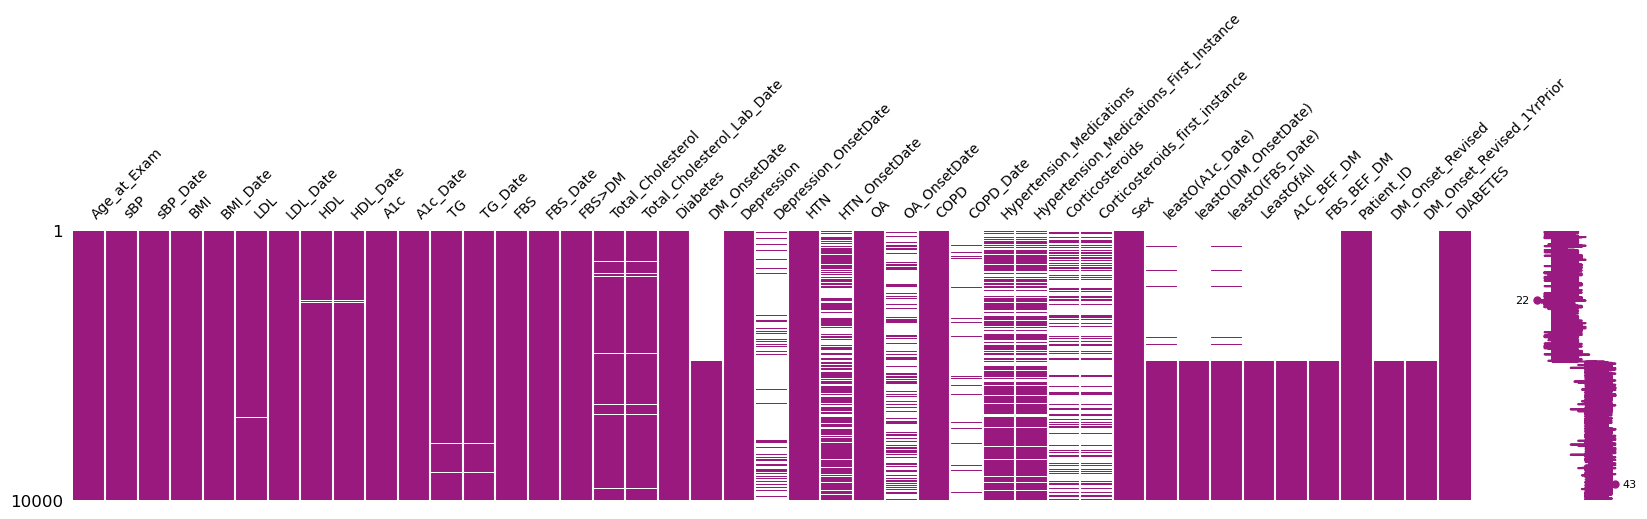

In [ ]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df, figsize=(20,3.5), fontsize=10, color=(.6,.1,0.5))

## 2.2 Exploratory Data Analysis of Target Feature

In [ ]:
import plotly.express as px

# Compute the count of each class in the 'target' column
counts = df['Diabetes'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='DIABETES'
    ),
    title=dict(
        text='Distribution of Classes in "DIABETES"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

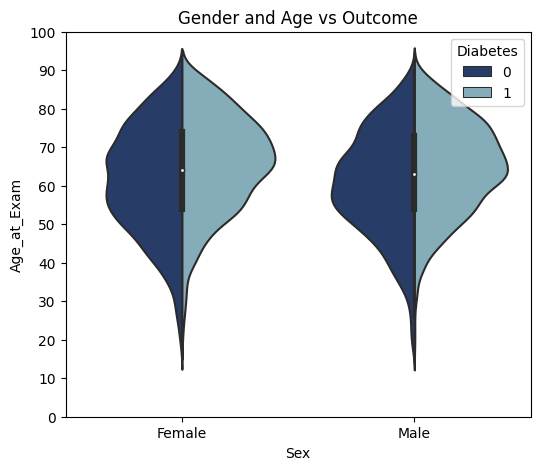

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(x="Sex", y="Age_at_Exam", hue="Diabetes",
               data=df, split=True, palette=['#1c3a73', '#7cb1c2'])
plt.title('Gender and Age vs Outcome')
plt.yticks(range(0, 110, 10))
plt.show()

## 2.3 Distribution of Features

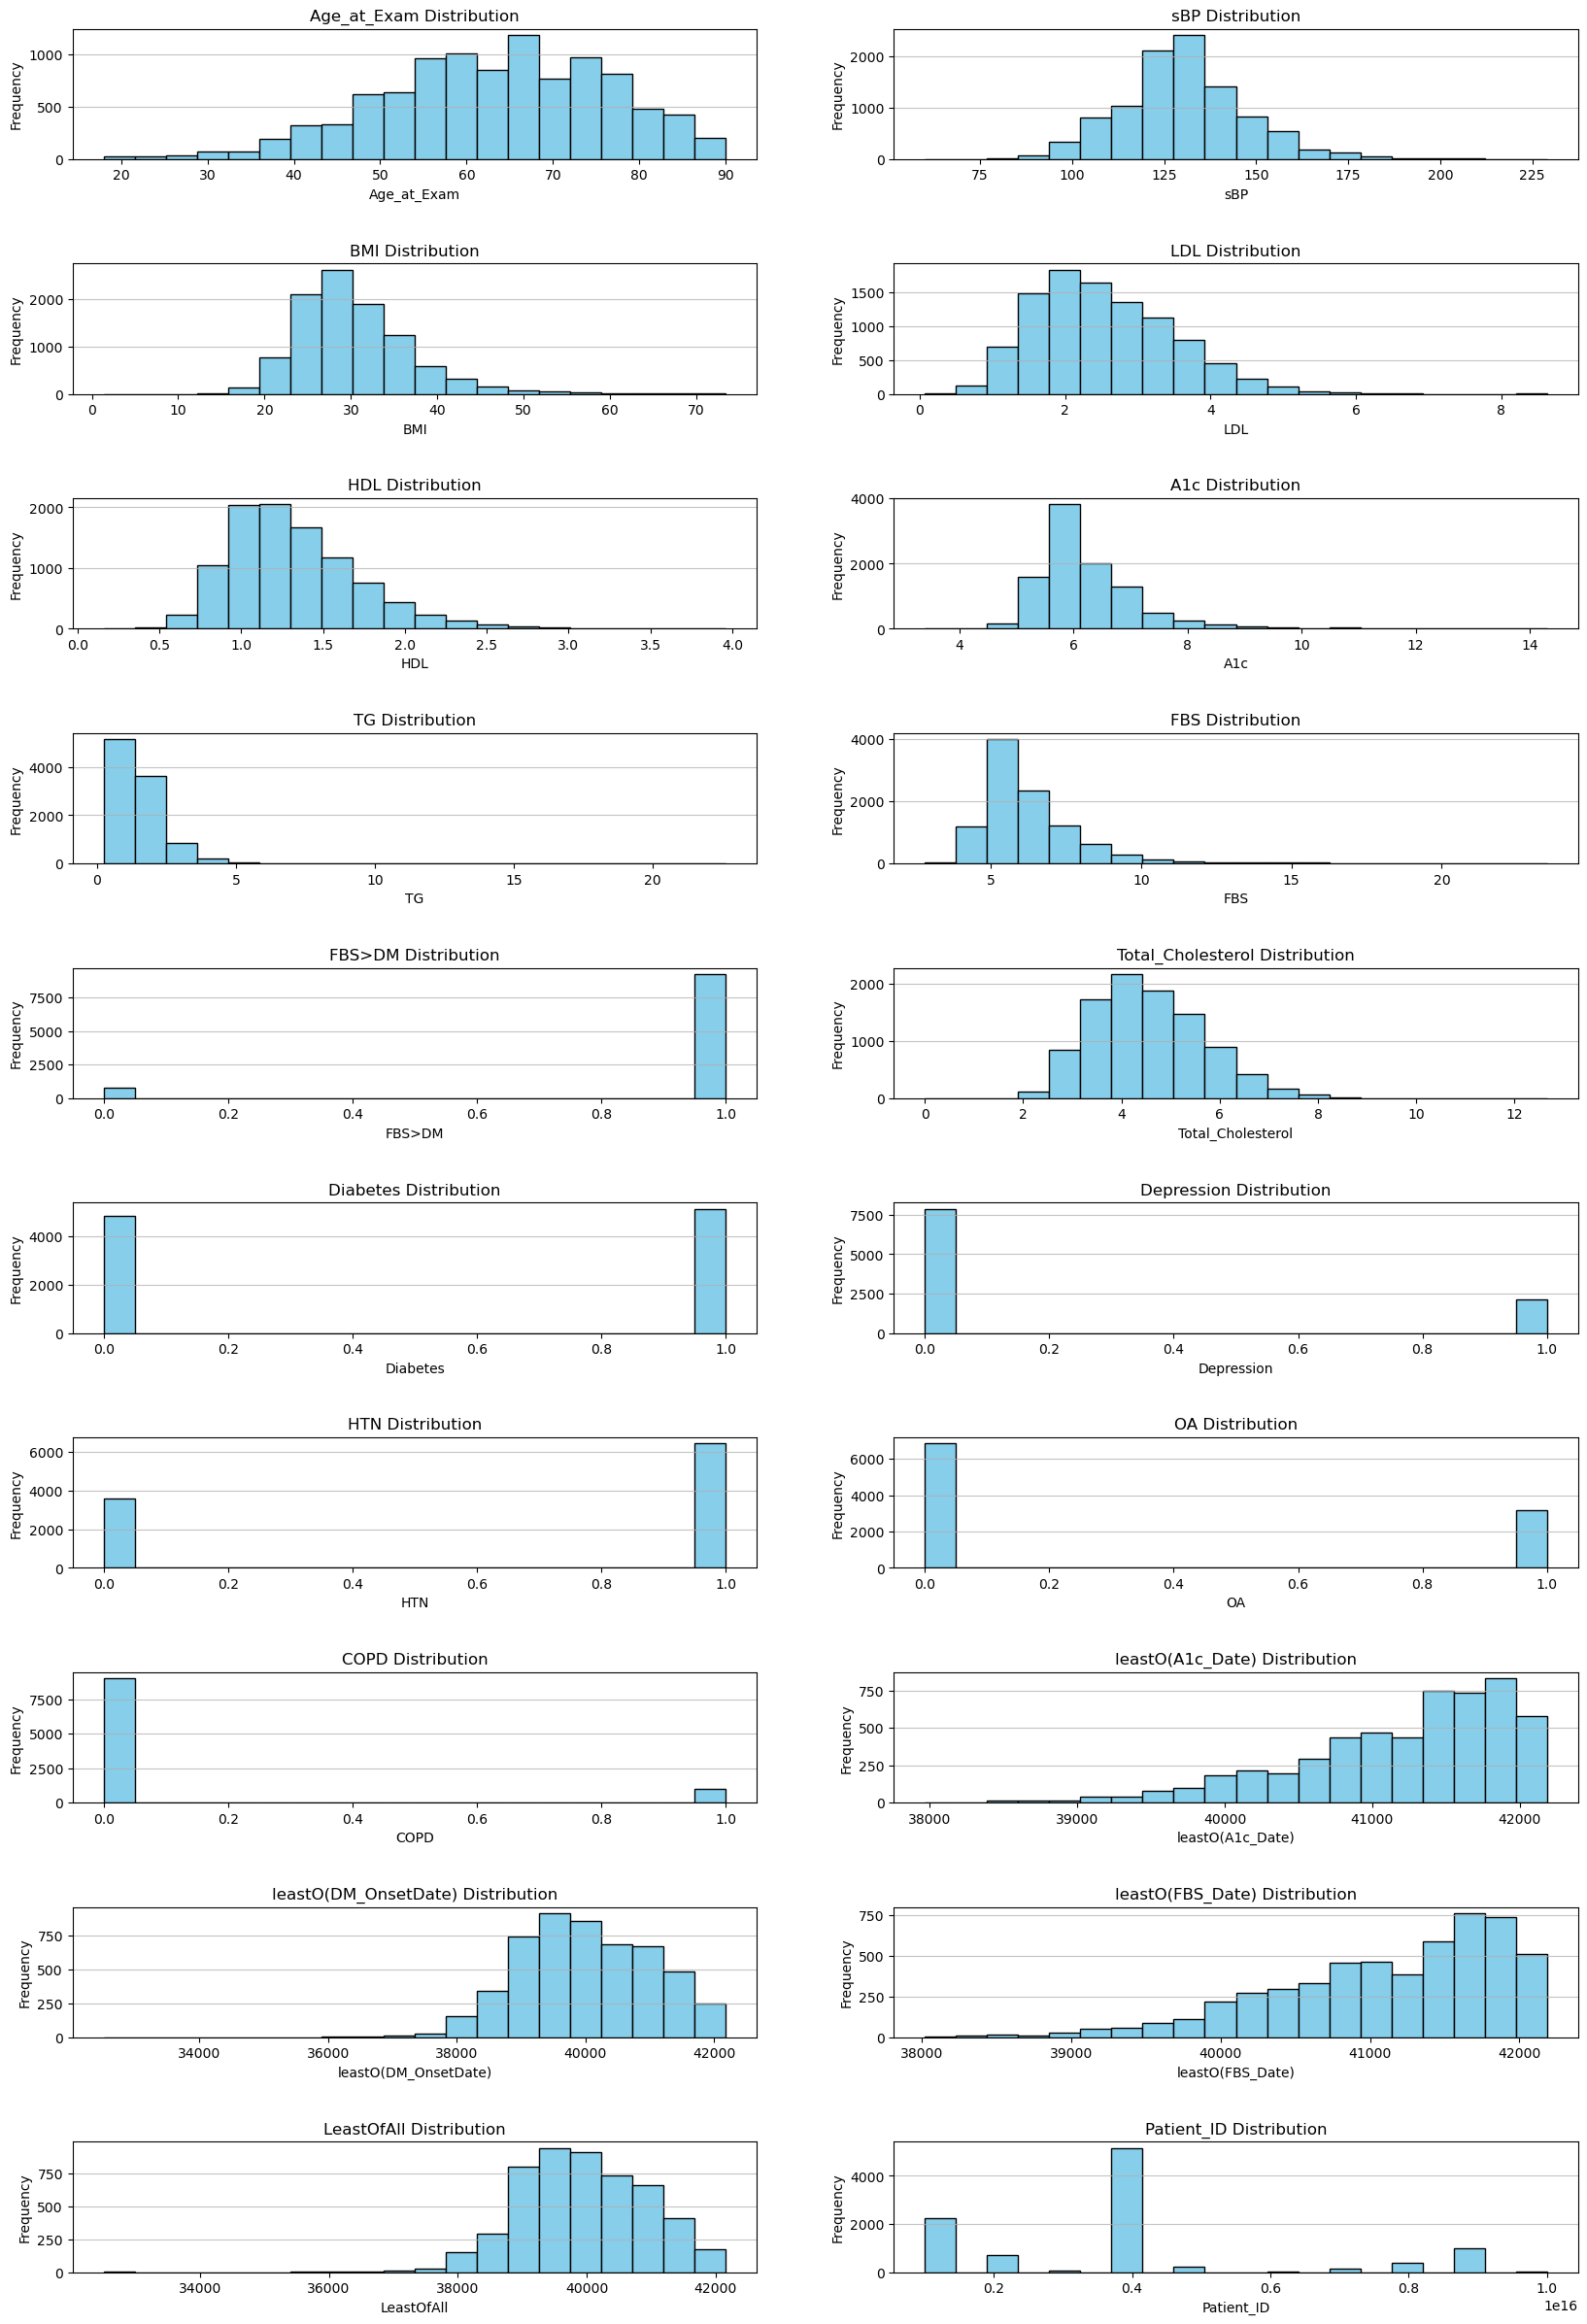

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the list of column names (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for the grid
num_columns_per_row = 2
num_rows = (len(numeric_columns) + num_columns_per_row - 1) // num_columns_per_row

# Create a grid of histograms
fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(20, 30))
fig.subplots_adjust(hspace=0.8)

for i, column in enumerate(numeric_columns):
    row = i // num_columns_per_row
    col = i % num_columns_per_row

    ax = axes[row, col]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

# Remove any empty subplots
for i in range(len(numeric_columns), num_rows * num_columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
print(df.describe())

        Age_at_Exam          sBP           BMI          LDL          HDL  \
count  10000.000000  9996.000000  10000.000000  9939.000000  9928.000000   
mean      63.197600   130.394358     30.415909     2.540959     1.321803   
std       13.127627    17.018794      6.831567     0.949213     0.402217   
min       18.000000    60.000000      1.376352     0.070000     0.160000   
25%       54.000000   120.000000     25.898654     1.820000     1.040000   
50%       64.000000   130.000000     29.300000     2.400000     1.250000   
75%       73.000000   140.000000     33.790000     3.160000     1.540000   
max       90.000000   229.000000     73.400000     8.630000     3.960000   

                A1c           TG           FBS        FBS>DM  \
count  10000.000000  9947.000000  10000.000000  10000.000000   
mean       6.266754     1.553615      6.311903      0.922800   
std        0.954380     1.021511      1.733209      0.266922   
min        3.400000     0.240000      2.800000      0.00000

## 2.4 Observing Feature Correlation Matrix

<Axes: >

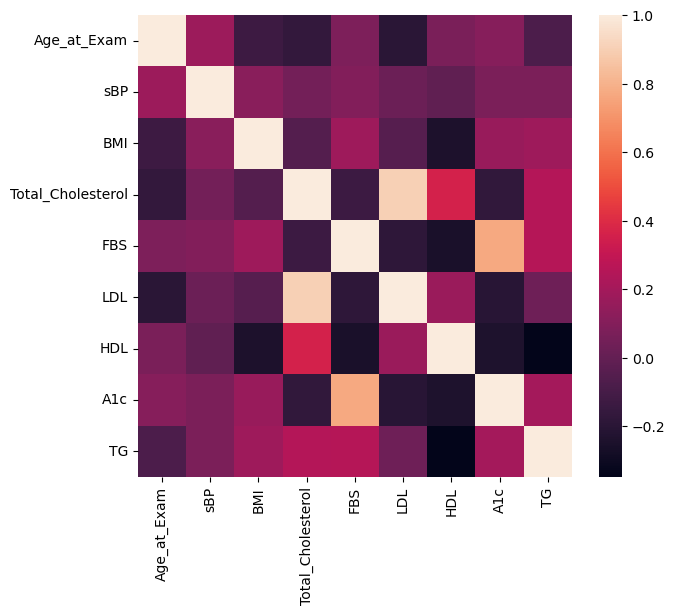

In [ ]:
columns_to_check = ["Age_at_Exam","sBP","BMI","Total_Cholesterol","FBS","LDL","HDL", "A1c", "TG"]

plt.figure(figsize=(7,6))
sns.heatmap(df[columns_to_check].corr())

## 2.5 Distribution of Continuous Features by Target Classes

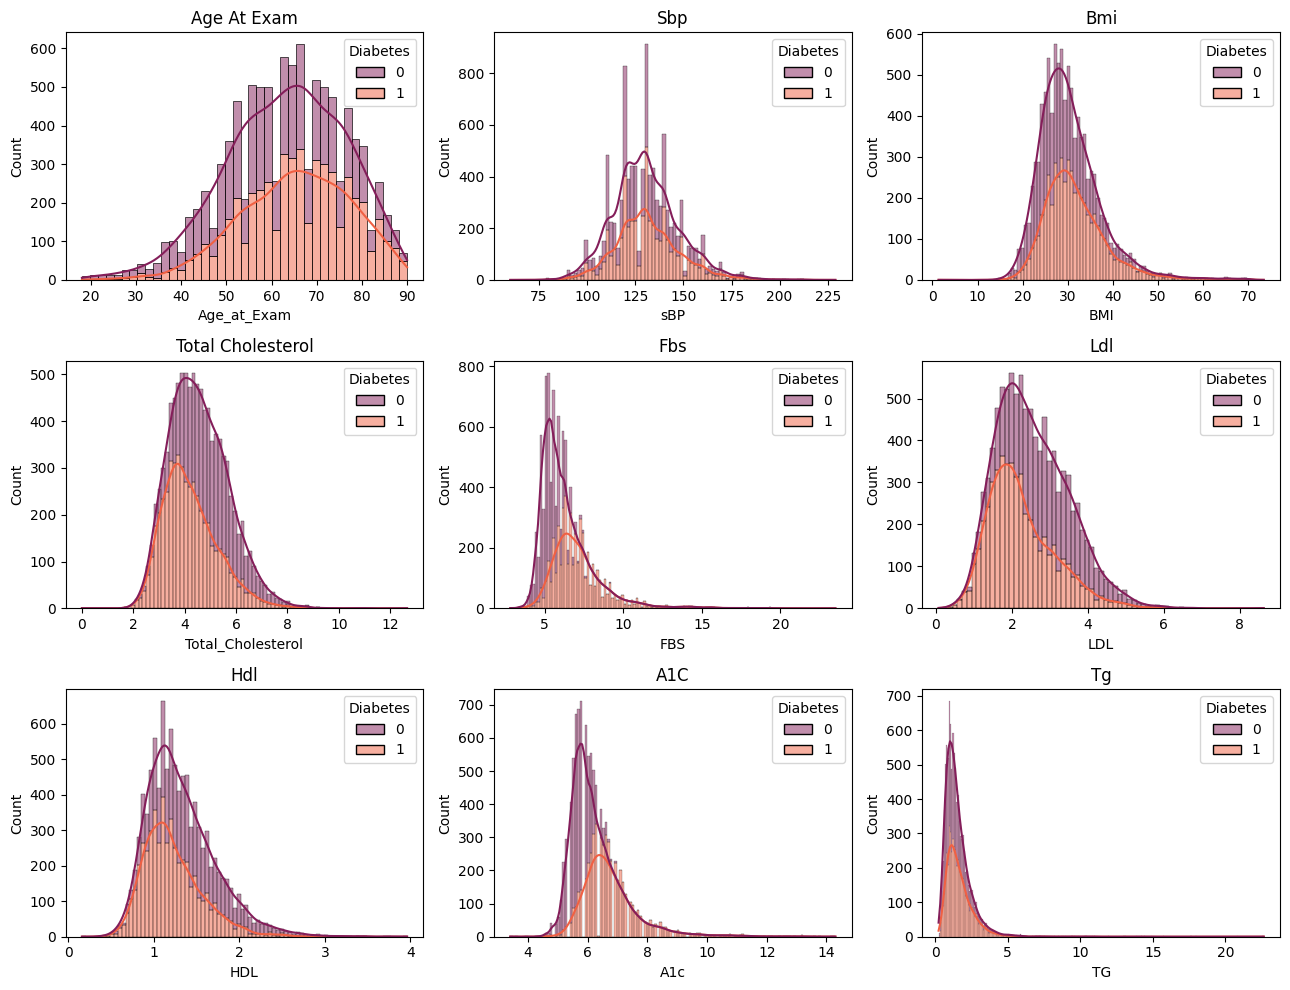

In [ ]:
# Updating the list of meaningful columns based on the available columns in the dataset
selected_columns_for_analysis = ["Age_at_Exam","sBP","BMI","Total_Cholesterol","FBS","LDL","HDL", "A1c", "TG"]

# Creating a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(13, 10))

# Looping over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plotting a histogram of the feature split by the 'readmitted' class
    sns.histplot(df, x=column, hue='Diabetes', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjusting the layout and display all the subplots
plt.tight_layout()
plt.show()


# 3.0 Data Preparation

## 3.1 Transforming 'Sex' Feature

In [3]:
df['Sex'].replace({'Female':0, 'Male':1}, inplace=True)
dropping_columns = ['sBP_Date', 'Patient_ID', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date', 'TG_Date', 'FBS_Date', 'FBS>DM', 'Total_Cholesterol_Lab_Date', 'DM_OnsetDate', 'Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date', 'Hypertension_Medications', 'Hypertension_Medications_First_Instance', 'Corticosteroids', 'Corticosteroids_first_instance', 'leastO(A1c_Date)', 'leastO(DM_OnsetDate)','leastO(FBS_Date)', 'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'DM_Onset_Revised','DM_Onset_Revised_1YrPrior','DIABETES']
df = df.drop(columns=dropping_columns, axis=1)

## 3.2 Data Splitting

In [4]:
train_df = df.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_df = df.drop(train_df.index)

# Check the mean of the 'Diabetes' column in both training and testing data
train_df['Diabetes'].mean() #0.518
test_df['Diabetes'].mean() #0.504

0.5043333333333333

# 4.0 Neural Network Model Building

## 4.1 Median Imputation

In [5]:
train_df = df.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_df = df.drop(train_df.index)

imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(train_df[["HDL"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["HDL"] = imputer.transform(train_df[['HDL']])
test_df["HDL"] = imputer.transform(test_df[['HDL']])

imputer.fit(train_df[["LDL"]])
# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["LDL"] = imputer.transform(train_df[['LDL']])
test_df["LDL"] = imputer.transform(test_df[['LDL']])

imputer.fit(train_df[["sBP"]])
train_df["sBP"] = imputer.transform(train_df[['sBP']])
test_df["sBP"] = imputer.transform(test_df[['sBP']])

imputer.fit(train_df[["TG"]])
train_df["TG"] = imputer.transform(train_df[['TG']])
test_df["TG"] = imputer.transform(test_df[['TG']])

imputer.fit(train_df[["Total_Cholesterol"]])
train_df["Total_Cholesterol"] = imputer.transform(train_df[['Total_Cholesterol']])
test_df["Total_Cholesterol"] = imputer.transform(test_df[['Total_Cholesterol']])

# Extract the 'Diabetes' column as the target variable for training and testing
Y_train = train_df['Diabetes'].to_numpy()
Y_test = test_df['Diabetes'].to_numpy()

# Extract the features (excluding 'Diabetes') for training and testing
X_train = train_df.drop('Diabetes', axis=1).to_numpy()
X_test = test_df.drop('Diabetes', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 4.2 Recursive Feature Elimination with Cross-Validation (RFECV) - Using Logistic Regression model (*Feature Selection Method*)

In [6]:
train_df.isnull().sum()

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
Total_Cholesterol    0
Diabetes             0
Depression           0
HTN                  0
OA                   0
COPD                 0
Sex                  0
dtype: int64

In [7]:
model = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=1,
)
rfecv.fit(X_train, Y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 7


In [8]:
df.columns[list(rfecv.support_) + [True]] # Remove FBS from following models due to high correlation with A1c and literature says A1c is better indicator of blood sugar

# Also removed total cholesterol due to high collinearity data-wise and conceptually with LDL

Index(['BMI', 'LDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'Depression',
       'Sex'],
      dtype='object')

In [9]:
columns_to_keep = ["BMI", "LDL", "A1c","TG", "Depression", "Sex", "Diabetes"]

df_rfecv = df[columns_to_keep]

### 4.2.1 Median Imputation (RFECV Features)

In [10]:
train_df = df_rfecv.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_df = df_rfecv.drop(train_df.index)

imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(train_df[["LDL"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["LDL"] = imputer.transform(train_df[['LDL']])
test_df["LDL"] = imputer.transform(test_df[['LDL']])

imputer.fit(train_df[["TG"]])
train_df["TG"] = imputer.transform(train_df[['TG']])
test_df["TG"] = imputer.transform(test_df[['TG']])

# Extract the 'Diabetes' column as the target variable for training and testing
Y_train = train_df['Diabetes'].to_numpy()
Y_test = test_df['Diabetes'].to_numpy()

# Extract the features (excluding 'Diabetes') for training and testing
X_train = train_df.drop('Diabetes', axis=1).to_numpy()
X_test = test_df.drop('Diabetes', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Define Tensors

In [11]:
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

### 4.2.2 Grid Search for Hyperparameter Tuning (*Dropout Regularization*)

In [ ]:
import random

number_of_input_features = 6
epochs = 1000

# Define the hyperparameter space
hyperparameter_space = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'number_of_hidden_units': [64, 128, 256],
    'dropout_probability': [0.2, 0.3, 0.4]
}

# Lists to store results for each set of hyperparameters
random_search_results = []

# Random Search
num_iterations = 10  # Number of iterations for random search

for _ in range(num_iterations):
    # Randomly select hyperparameters
    hyperparams = {
        'learning_rate': random.choice(hyperparameter_space['learning_rate']),
        'batch_size': random.choice(hyperparameter_space['batch_size']),
        'number_of_hidden_units': random.choice(hyperparameter_space['number_of_hidden_units']),
        'dropout_probability': random.choice(hyperparameter_space['dropout_probability'])
    }

    # Create and train the model with the current set of hyperparameters
    model = nn.Sequential(
        nn.Linear(number_of_input_features, hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Dropout(hyperparams['dropout_probability']),
        nn.Linear(hyperparams['number_of_hidden_units'], hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Dropout(hyperparams['dropout_probability']),
        nn.Linear(hyperparams['number_of_hidden_units'], 1),
        nn.Sigmoid()
    )

    optimizer = Adam(model.parameters(), lr=hyperparams['learning_rate'])
    loss_fn = t.nn.BCELoss()

    # Prepare data loader
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)

    # Training loop
    for epoch in range(epochs):
        per_epoch_loss_list = []

        for batch_idx, (X, Y) in enumerate(train_data_loader):
            probs = model(X)
            loss = loss_fn(probs.view(-1), Y)
            per_epoch_loss_list.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on validation data
    with t.no_grad():
        model.eval()

        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        random_search_results.append({
            'hyperparameters': hyperparams,
            'validation_accuracy': validation_accuracy
        })

# Print or analyze the random grid search results
for result in random_search_results:
    print(f"Hyperparameters: {result['hyperparameters']}")
    print(f"Validation Accuracy: {result['validation_accuracy']}")
    print()


Hyperparameters: {'learning_rate': 0.01, 'batch_size': 128, 'number_of_hidden_units': 128, 'dropout_probability': 0.2}
Validation Accuracy: 0.8209999799728394

Hyperparameters: {'learning_rate': 0.001, 'batch_size': 128, 'number_of_hidden_units': 256, 'dropout_probability': 0.4}
Validation Accuracy: 0.8356666564941406

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 128, 'number_of_hidden_units': 64, 'dropout_probability': 0.2}
Validation Accuracy: 0.8339999914169312

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 128, 'number_of_hidden_units': 256, 'dropout_probability': 0.2}
Validation Accuracy: 0.8320000171661377

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'number_of_hidden_units': 256, 'dropout_probability': 0.3}
Validation Accuracy: 0.8163333535194397

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 64, 'number_of_hidden_units': 64, 'dropout_probability': 0.4}
Validation Accuracy: 0.8349999785423279

Hyperparameters: {'learning_rate': 0.

### 4.2.3 First Neural Network - Dropout, Two layers

In [ ]:
number_of_input_features = 6
number_of_hidden_units = 256
epochs = 1000
learning_rate = 0.001
batch_size = 128
dropout_probability = 0.4

# Prepare the data
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with drop-out
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),
    nn.Tanh(),
    nn.Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, number_of_hidden_units),
    nn.Tanh(),
    nn.Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),
    nn.Sigmoid()  # Sigmoid activation for probability output due to binary outcome
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy: 0.8335714340209961, validation_accuracy: 0.8346666693687439
epoch 1/1000 ---> train_accuracy: 0.8327142596244812, validation_accuracy: 0.8339999914169312
epoch 2/1000 ---> train_accuracy: 0.8345714211463928, validation_accuracy: 0.8316666483879089
epoch 3/1000 ---> train_accuracy: 0.8332856893539429, validation_accuracy: 0.8316666483879089
epoch 4/1000 ---> train_accuracy: 0.8357142806053162, validation_accuracy: 0.8346666693687439
epoch 5/1000 ---> train_accuracy: 0.8318571448326111, validation_accuracy: 0.8330000042915344
epoch 6/1000 ---> train_accuracy: 0.8324285745620728, validation_accuracy: 0.8309999704360962
epoch 7/1000 ---> train_accuracy: 0.8325714468955994, validation_accuracy: 0.8339999914169312
epoch 8/1000 ---> train_accuracy: 0.8351428508758545, validation_accuracy: 0.8330000042915344
epoch 9/1000 ---> train_accuracy: 0.8325714468955994, validation_accuracy: 0.8349999785423279
epoch 10/1000 ---> train_accuracy: 0.8354285955429077, valid

epoch 88/1000 ---> train_accuracy: 0.8418571352958679, validation_accuracy: 0.8343333601951599
epoch 89/1000 ---> train_accuracy: 0.8421428799629211, validation_accuracy: 0.8349999785423279
epoch 90/1000 ---> train_accuracy: 0.8397142887115479, validation_accuracy: 0.8303333520889282
epoch 91/1000 ---> train_accuracy: 0.8428571224212646, validation_accuracy: 0.8333333134651184
epoch 92/1000 ---> train_accuracy: 0.8401428461074829, validation_accuracy: 0.8370000123977661
epoch 93/1000 ---> train_accuracy: 0.8418571352958679, validation_accuracy: 0.8303333520889282
epoch 94/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8323333263397217
epoch 95/1000 ---> train_accuracy: 0.8425714373588562, validation_accuracy: 0.8330000042915344
epoch 96/1000 ---> train_accuracy: 0.8412857055664062, validation_accuracy: 0.8370000123977661
epoch 97/1000 ---> train_accuracy: 0.8427143096923828, validation_accuracy: 0.8333333134651184
epoch 98/1000 ---> train_accuracy: 0.8401428461074

epoch 175/1000 ---> train_accuracy: 0.8462857007980347, validation_accuracy: 0.8343333601951599
epoch 176/1000 ---> train_accuracy: 0.8462857007980347, validation_accuracy: 0.8333333134651184
epoch 177/1000 ---> train_accuracy: 0.8484285473823547, validation_accuracy: 0.8289999961853027
epoch 178/1000 ---> train_accuracy: 0.8498571515083313, validation_accuracy: 0.8343333601951599
epoch 179/1000 ---> train_accuracy: 0.8484285473823547, validation_accuracy: 0.8353333473205566
epoch 180/1000 ---> train_accuracy: 0.8468571305274963, validation_accuracy: 0.8360000252723694
epoch 181/1000 ---> train_accuracy: 0.8475714325904846, validation_accuracy: 0.8349999785423279
epoch 182/1000 ---> train_accuracy: 0.849142849445343, validation_accuracy: 0.8293333053588867
epoch 183/1000 ---> train_accuracy: 0.8489999771118164, validation_accuracy: 0.8346666693687439
epoch 184/1000 ---> train_accuracy: 0.8485714197158813, validation_accuracy: 0.8330000042915344
epoch 185/1000 ---> train_accuracy: 0.847

epoch 262/1000 ---> train_accuracy: 0.8517143130302429, validation_accuracy: 0.8320000171661377
epoch 263/1000 ---> train_accuracy: 0.8519999980926514, validation_accuracy: 0.8270000219345093
epoch 264/1000 ---> train_accuracy: 0.8548571467399597, validation_accuracy: 0.8306666612625122
epoch 265/1000 ---> train_accuracy: 0.8528571724891663, validation_accuracy: 0.8306666612625122
epoch 266/1000 ---> train_accuracy: 0.852571427822113, validation_accuracy: 0.8289999961853027
epoch 267/1000 ---> train_accuracy: 0.8527143001556396, validation_accuracy: 0.8299999833106995
epoch 268/1000 ---> train_accuracy: 0.8479999899864197, validation_accuracy: 0.815666675567627
epoch 269/1000 ---> train_accuracy: 0.852571427822113, validation_accuracy: 0.8286666870117188
epoch 270/1000 ---> train_accuracy: 0.8519999980926514, validation_accuracy: 0.8336666822433472
epoch 271/1000 ---> train_accuracy: 0.8531428575515747, validation_accuracy: 0.8323333263397217
epoch 272/1000 ---> train_accuracy: 0.85242

epoch 348/1000 ---> train_accuracy: 0.8571428656578064, validation_accuracy: 0.831333339214325
epoch 349/1000 ---> train_accuracy: 0.8582857251167297, validation_accuracy: 0.8316666483879089
epoch 350/1000 ---> train_accuracy: 0.8561428785324097, validation_accuracy: 0.8286666870117188
epoch 351/1000 ---> train_accuracy: 0.8602856993675232, validation_accuracy: 0.8306666612625122
epoch 352/1000 ---> train_accuracy: 0.8575714230537415, validation_accuracy: 0.828000009059906
epoch 353/1000 ---> train_accuracy: 0.8579999804496765, validation_accuracy: 0.8289999961853027
epoch 354/1000 ---> train_accuracy: 0.8554285764694214, validation_accuracy: 0.8303333520889282
epoch 355/1000 ---> train_accuracy: 0.8568571209907532, validation_accuracy: 0.8309999704360962
epoch 356/1000 ---> train_accuracy: 0.8588571548461914, validation_accuracy: 0.8309999704360962
epoch 357/1000 ---> train_accuracy: 0.8567143082618713, validation_accuracy: 0.8299999833106995
epoch 358/1000 ---> train_accuracy: 0.8584

epoch 434/1000 ---> train_accuracy: 0.8597142696380615, validation_accuracy: 0.8316666483879089
epoch 435/1000 ---> train_accuracy: 0.8621428608894348, validation_accuracy: 0.8286666870117188
epoch 436/1000 ---> train_accuracy: 0.8598571419715881, validation_accuracy: 0.8296666741371155
epoch 437/1000 ---> train_accuracy: 0.8605714440345764, validation_accuracy: 0.8309999704360962
epoch 438/1000 ---> train_accuracy: 0.8579999804496765, validation_accuracy: 0.8299999833106995
epoch 439/1000 ---> train_accuracy: 0.8608571290969849, validation_accuracy: 0.831333339214325
epoch 440/1000 ---> train_accuracy: 0.8588571548461914, validation_accuracy: 0.8299999833106995
epoch 441/1000 ---> train_accuracy: 0.8577142953872681, validation_accuracy: 0.8243333101272583
epoch 442/1000 ---> train_accuracy: 0.8579999804496765, validation_accuracy: 0.8286666870117188
epoch 443/1000 ---> train_accuracy: 0.8587142825126648, validation_accuracy: 0.8303333520889282
epoch 444/1000 ---> train_accuracy: 0.860

epoch 520/1000 ---> train_accuracy: 0.8610000014305115, validation_accuracy: 0.8333333134651184
epoch 521/1000 ---> train_accuracy: 0.8622857332229614, validation_accuracy: 0.8276666402816772
epoch 522/1000 ---> train_accuracy: 0.8635714054107666, validation_accuracy: 0.8320000171661377
epoch 523/1000 ---> train_accuracy: 0.8615714311599731, validation_accuracy: 0.8320000171661377
epoch 524/1000 ---> train_accuracy: 0.8622857332229614, validation_accuracy: 0.8303333520889282
epoch 525/1000 ---> train_accuracy: 0.8621428608894348, validation_accuracy: 0.8286666870117188
epoch 526/1000 ---> train_accuracy: 0.8642857074737549, validation_accuracy: 0.8320000171661377
epoch 527/1000 ---> train_accuracy: 0.8632857203483582, validation_accuracy: 0.8316666483879089
epoch 528/1000 ---> train_accuracy: 0.8640000224113464, validation_accuracy: 0.8306666612625122
epoch 529/1000 ---> train_accuracy: 0.8634285926818848, validation_accuracy: 0.8306666612625122
epoch 530/1000 ---> train_accuracy: 0.86

epoch 606/1000 ---> train_accuracy: 0.8645714521408081, validation_accuracy: 0.8326666951179504
epoch 607/1000 ---> train_accuracy: 0.8652856945991516, validation_accuracy: 0.8346666693687439
epoch 608/1000 ---> train_accuracy: 0.8657143115997314, validation_accuracy: 0.8339999914169312
epoch 609/1000 ---> train_accuracy: 0.8652856945991516, validation_accuracy: 0.8326666951179504
epoch 610/1000 ---> train_accuracy: 0.8655714392662048, validation_accuracy: 0.8343333601951599
epoch 611/1000 ---> train_accuracy: 0.8647142648696899, validation_accuracy: 0.8333333134651184
epoch 612/1000 ---> train_accuracy: 0.8665714263916016, validation_accuracy: 0.8339999914169312
epoch 613/1000 ---> train_accuracy: 0.8644285798072815, validation_accuracy: 0.8286666870117188
epoch 614/1000 ---> train_accuracy: 0.8641428351402283, validation_accuracy: 0.8306666612625122
epoch 615/1000 ---> train_accuracy: 0.8657143115997314, validation_accuracy: 0.8330000042915344
epoch 616/1000 ---> train_accuracy: 0.86

epoch 694/1000 ---> train_accuracy: 0.8661428689956665, validation_accuracy: 0.831333339214325
epoch 695/1000 ---> train_accuracy: 0.8667142987251282, validation_accuracy: 0.8333333134651184
epoch 696/1000 ---> train_accuracy: 0.8667142987251282, validation_accuracy: 0.8353333473205566
epoch 697/1000 ---> train_accuracy: 0.866428554058075, validation_accuracy: 0.8323333263397217
epoch 698/1000 ---> train_accuracy: 0.8645714521408081, validation_accuracy: 0.8309999704360962
epoch 699/1000 ---> train_accuracy: 0.866428554058075, validation_accuracy: 0.8293333053588867
epoch 700/1000 ---> train_accuracy: 0.8672857284545898, validation_accuracy: 0.831333339214325
epoch 701/1000 ---> train_accuracy: 0.8672857284545898, validation_accuracy: 0.8293333053588867
epoch 702/1000 ---> train_accuracy: 0.8659999966621399, validation_accuracy: 0.8330000042915344
epoch 703/1000 ---> train_accuracy: 0.866428554058075, validation_accuracy: 0.8320000171661377
epoch 704/1000 ---> train_accuracy: 0.8684285

epoch 780/1000 ---> train_accuracy: 0.8691428303718567, validation_accuracy: 0.8316666483879089
epoch 781/1000 ---> train_accuracy: 0.8678571581840515, validation_accuracy: 0.828000009059906
epoch 782/1000 ---> train_accuracy: 0.8692857027053833, validation_accuracy: 0.8323333263397217
epoch 783/1000 ---> train_accuracy: 0.8692857027053833, validation_accuracy: 0.8336666822433472
epoch 784/1000 ---> train_accuracy: 0.868571400642395, validation_accuracy: 0.8339999914169312
epoch 785/1000 ---> train_accuracy: 0.8658571243286133, validation_accuracy: 0.8316666483879089
epoch 786/1000 ---> train_accuracy: 0.8709999918937683, validation_accuracy: 0.8339999914169312
epoch 787/1000 ---> train_accuracy: 0.8674286007881165, validation_accuracy: 0.8296666741371155
epoch 788/1000 ---> train_accuracy: 0.869857132434845, validation_accuracy: 0.8336666822433472
epoch 789/1000 ---> train_accuracy: 0.8675714135169983, validation_accuracy: 0.8276666402816772
epoch 790/1000 ---> train_accuracy: 0.86599

epoch 867/1000 ---> train_accuracy: 0.8682857155799866, validation_accuracy: 0.8309999704360962
epoch 868/1000 ---> train_accuracy: 0.8690000176429749, validation_accuracy: 0.8326666951179504
epoch 869/1000 ---> train_accuracy: 0.8718571662902832, validation_accuracy: 0.8349999785423279
epoch 870/1000 ---> train_accuracy: 0.8704285621643066, validation_accuracy: 0.8309999704360962
epoch 871/1000 ---> train_accuracy: 0.8708571195602417, validation_accuracy: 0.8316666483879089
epoch 872/1000 ---> train_accuracy: 0.8695714473724365, validation_accuracy: 0.8306666612625122
epoch 873/1000 ---> train_accuracy: 0.8695714473724365, validation_accuracy: 0.8273333311080933
epoch 874/1000 ---> train_accuracy: 0.8690000176429749, validation_accuracy: 0.8263333439826965
epoch 875/1000 ---> train_accuracy: 0.8688571453094482, validation_accuracy: 0.8276666402816772
epoch 876/1000 ---> train_accuracy: 0.86814284324646, validation_accuracy: 0.8339999914169312
epoch 877/1000 ---> train_accuracy: 0.8695

epoch 955/1000 ---> train_accuracy: 0.8725714087486267, validation_accuracy: 0.8299999833106995
epoch 956/1000 ---> train_accuracy: 0.8709999918937683, validation_accuracy: 0.8289999961853027
epoch 957/1000 ---> train_accuracy: 0.8730000257492065, validation_accuracy: 0.8286666870117188
epoch 958/1000 ---> train_accuracy: 0.8705714344978333, validation_accuracy: 0.8309999704360962
epoch 959/1000 ---> train_accuracy: 0.8707143068313599, validation_accuracy: 0.8306666612625122
epoch 960/1000 ---> train_accuracy: 0.87157142162323, validation_accuracy: 0.8293333053588867
epoch 961/1000 ---> train_accuracy: 0.8718571662902832, validation_accuracy: 0.8323333263397217
epoch 962/1000 ---> train_accuracy: 0.8727142810821533, validation_accuracy: 0.8296666741371155
epoch 963/1000 ---> train_accuracy: 0.8705714344978333, validation_accuracy: 0.8293333053588867
epoch 964/1000 ---> train_accuracy: 0.8717142939567566, validation_accuracy: 0.831333339214325
epoch 965/1000 ---> train_accuracy: 0.87042

In [ ]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8389999866485596

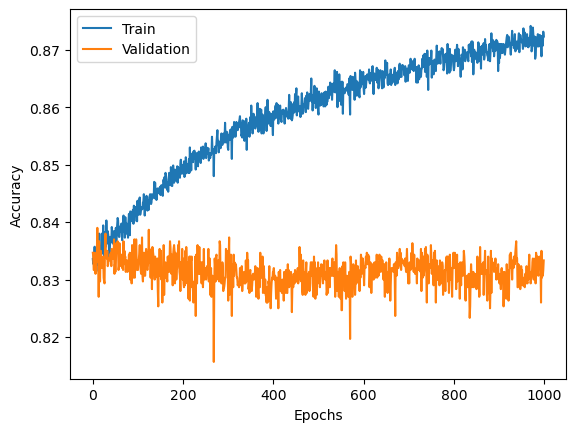

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 4.2.4 Grid Search for Hyperparameter Tuning (Lambda Regularization)

In [ ]:
import torch as t
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import random

# Define the hyperparameter space
hyperparameter_space = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'number_of_hidden_units': [64, 128, 256],
    'landa': [0.001, 0.01, 0.1]
}

# Lists to store results for each set of hyperparameters
random_search_results = []

# Random Search
num_iterations = 10  # Number of iterations for random search

for _ in range(num_iterations):
    # Randomly select hyperparameters
    hyperparams = {
        'learning_rate': random.choice(hyperparameter_space['learning_rate']),
        'batch_size': random.choice(hyperparameter_space['batch_size']),
        'number_of_hidden_units': random.choice(hyperparameter_space['number_of_hidden_units']),
        'landa': random.choice(hyperparameter_space['landa'])  # Replace dropout_probability with landa
    }

    # Create and train the model with the current set of hyperparameters
    model = nn.Sequential(
        nn.Linear(number_of_input_features, hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Linear(hyperparams['number_of_hidden_units'], hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Linear(hyperparams['number_of_hidden_units'], 1),
        nn.Sigmoid()
    )

    optimizer = Adam(model.parameters(), lr=hyperparams['learning_rate'])
    loss_fn = t.nn.BCELoss()

    # Prepare data loader
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)

    # Training loop
    for epoch in range(epochs):
        per_epoch_loss_list = []

        for batch_idx, (X, Y) in enumerate(train_data_loader):
            probs = model(X)
            l2_term = sum([(w ** 2).sum() for w in model.parameters()])
            loss = loss_fn(probs.view(-1), Y) + hyperparams['landa'] * l2_term
            per_epoch_loss_list.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on validation data
    with t.no_grad():
        model.eval()

        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        random_search_results.append({
            'hyperparameters': hyperparams,
            'validation_accuracy': validation_accuracy
        })

# Print or analyze the random grid search results
for result in random_search_results:
    print(f"Hyperparameters: {result['hyperparameters']}")
    print(f"Validation Accuracy: {result['validation_accuracy']}")
    print()


Hyperparameters: {'learning_rate': 0.01, 'batch_size': 128, 'number_of_hidden_units': 256, 'landa': 0.001}
Validation Accuracy: 0.8346666693687439

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 32, 'number_of_hidden_units': 64, 'landa': 0.01}
Validation Accuracy: 0.831333339214325

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 128, 'number_of_hidden_units': 128, 'landa': 0.01}
Validation Accuracy: 0.8233333230018616

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 64, 'number_of_hidden_units': 256, 'landa': 0.001}
Validation Accuracy: 0.8366666436195374

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 32, 'number_of_hidden_units': 128, 'landa': 0.01}
Validation Accuracy: 0.7990000247955322

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 128, 'number_of_hidden_units': 128, 'landa': 0.01}
Validation Accuracy: 0.8306666612625122

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 128, 'number_of_hidden_units': 128, 'landa': 0.1}
Validation Accu

### 4.2.5 Second Neural Network - L2 Regularization, Two layers

In [ ]:
number_of_input_features = 6
number_of_hidden_units = 256
epochs = 1000
learning_rate = 0.0001
batch_size = 64
landa = 0.001

# Prepare the data
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, number_of_hidden_units),
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy
train_loss_list = []  # List to store training loss

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.8278571367263794, Validation Accuracy: 0.8256666660308838
Epoch 1/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8333333134651184
Epoch 2/1000 ---> Train Accuracy: 0.8327142596244812, Validation Accuracy: 0.8306666612625122
Epoch 3/1000 ---> Train Accuracy: 0.8332856893539429, Validation Accuracy: 0.831333339214325
Epoch 4/1000 ---> Train Accuracy: 0.833142876625061, Validation Accuracy: 0.8306666612625122
Epoch 5/1000 ---> Train Accuracy: 0.833142876625061, Validation Accuracy: 0.8306666612625122
Epoch 6/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8356666564941406
Epoch 7/1000 ---> Train Accuracy: 0.8311428427696228, Validation Accuracy: 0.831333339214325
Epoch 8/1000 ---> Train Accuracy: 0.8324285745620728, Validation Accuracy: 0.8309999704360962
Epoch 9/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8303333520889282
Epoch 10/1000 ---> Train Accuracy: 0.8335714340209961, Validatio

Epoch 88/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8316666483879089
Epoch 89/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8346666693687439
Epoch 90/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8336666822433472
Epoch 91/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8349999785423279
Epoch 92/1000 ---> Train Accuracy: 0.8349999785423279, Validation Accuracy: 0.8343333601951599
Epoch 93/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8346666693687439
Epoch 94/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8349999785423279
Epoch 95/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8309999704360962
Epoch 96/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8293333053588867
Epoch 97/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8333333134651184
Epoch 98/1000 ---> Train Accuracy: 0.8342857360839

Epoch 174/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8316666483879089
Epoch 175/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8306666612625122
Epoch 176/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.831333339214325
Epoch 177/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8326666951179504
Epoch 178/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8326666951179504
Epoch 179/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8306666612625122
Epoch 180/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8303333520889282
Epoch 181/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8316666483879089
Epoch 182/1000 ---> Train Accuracy: 0.833142876625061, Validation Accuracy: 0.8346666693687439
Epoch 183/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8316666483879089
Epoch 184/1000 ---> Train Accuracy: 0.834285

Epoch 260/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8330000042915344
Epoch 261/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8339999914169312
Epoch 262/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8289999961853027
Epoch 263/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8339999914169312
Epoch 264/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8330000042915344
Epoch 265/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.831333339214325
Epoch 266/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 267/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8309999704360962
Epoch 268/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8320000171661377
Epoch 269/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8316666483879089
Epoch 270/1000 ---> Train Accuracy: 0.834

Epoch 346/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8330000042915344
Epoch 347/1000 ---> Train Accuracy: 0.8351428508758545, Validation Accuracy: 0.8316666483879089
Epoch 348/1000 ---> Train Accuracy: 0.8349999785423279, Validation Accuracy: 0.8333333134651184
Epoch 349/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8306666612625122
Epoch 350/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8326666951179504
Epoch 351/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8330000042915344
Epoch 352/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8326666951179504
Epoch 353/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8339999914169312
Epoch 354/1000 ---> Train Accuracy: 0.8349999785423279, Validation Accuracy: 0.8323333263397217
Epoch 355/1000 ---> Train Accuracy: 0.8349999785423279, Validation Accuracy: 0.8330000042915344
Epoch 356/1000 ---> Train Accuracy: 0.835

Epoch 432/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8333333134651184
Epoch 433/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8333333134651184
Epoch 434/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8333333134651184
Epoch 435/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8353333473205566
Epoch 436/1000 ---> Train Accuracy: 0.8349999785423279, Validation Accuracy: 0.8330000042915344
Epoch 437/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8326666951179504
Epoch 438/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8336666822433472
Epoch 439/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8333333134651184
Epoch 440/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8353333473205566
Epoch 441/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8323333263397217
Epoch 442/1000 ---> Train Accuracy: 0.834

Epoch 518/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8339999914169312
Epoch 519/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8349999785423279
Epoch 520/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8346666693687439
Epoch 521/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8349999785423279
Epoch 522/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8346666693687439
Epoch 523/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8356666564941406
Epoch 524/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8349999785423279
Epoch 525/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8349999785423279
Epoch 526/1000 ---> Train Accuracy: 0.8355714082717896, Validation Accuracy: 0.8339999914169312
Epoch 527/1000 ---> Train Accuracy: 0.8355714082717896, Validation Accuracy: 0.8349999785423279
Epoch 528/1000 ---> Train Accuracy: 0.83

Epoch 604/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8363333344459534
Epoch 605/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8363333344459534
Epoch 606/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8333333134651184
Epoch 607/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8356666564941406
Epoch 608/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8343333601951599
Epoch 609/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8353333473205566
Epoch 610/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8349999785423279
Epoch 611/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8363333344459534
Epoch 612/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8346666693687439
Epoch 613/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8370000123977661
Epoch 614/1000 ---> Train Accuracy: 0.8354

Epoch 690/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8356666564941406
Epoch 691/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8356666564941406
Epoch 692/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8353333473205566
Epoch 693/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8363333344459534
Epoch 694/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8363333344459534
Epoch 695/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8349999785423279
Epoch 696/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8360000252723694
Epoch 697/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8363333344459534
Epoch 698/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8360000252723694
Epoch 699/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8349999785423279
Epoch 700/1000 ---> Train Accuracy: 0.835

Epoch 776/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8366666436195374
Epoch 777/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8353333473205566
Epoch 778/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8349999785423279
Epoch 779/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8363333344459534
Epoch 780/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8363333344459534
Epoch 781/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8366666436195374
Epoch 782/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8360000252723694
Epoch 783/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8363333344459534
Epoch 784/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8366666436195374
Epoch 785/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8353333473205566
Epoch 786/1000 ---> Train Accuracy: 0.836

Epoch 862/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8360000252723694
Epoch 863/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8366666436195374
Epoch 864/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8363333344459534
Epoch 865/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8360000252723694
Epoch 866/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8370000123977661
Epoch 867/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8360000252723694
Epoch 868/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8360000252723694
Epoch 869/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8353333473205566
Epoch 870/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8363333344459534
Epoch 871/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8360000252723694
Epoch 872/1000 ---> Train Accuracy: 0.8364

Epoch 948/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8363333344459534
Epoch 949/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8360000252723694
Epoch 950/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8353333473205566
Epoch 951/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8353333473205566
Epoch 952/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8360000252723694
Epoch 953/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8356666564941406
Epoch 954/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8363333344459534
Epoch 955/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8356666564941406
Epoch 956/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8360000252723694
Epoch 957/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8360000252723694
Epoch 958/1000 ---> Train Accuracy: 0.8364

In [ ]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8379999995231628

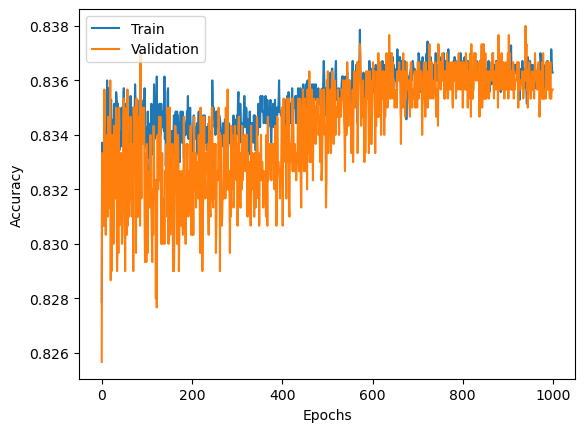

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 4.2.6 Third Neural Network - L2 Regularization, One Layer


In [15]:
number_of_input_features = 6
number_of_hidden_units = 256
epochs = 1000
learning_rate = 0.0001
batch_size = 64
landa = 0.001

# Prepare the data
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy
train_loss_list = []  # List to store training loss
train_f1_list = [] # List to store training F1 scores
validation_f1_list = [] # List to store validation F1 scores


# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate precision, recall, and F1 score on train data
        train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(Y_train_tensor, prediction, average='binary')
        train_f1_list.append(train_f1)

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Calculate precision, recall, and F1 score on validation data
        validation_precision, validation_recall, validation_f1, _ = precision_recall_fscore_support(Y_test_tensor, prediction, average='binary')
        validation_f1_list.append(validation_f1)

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Train F1: {train_f1}, Validation Accuracy: {validation_accuracy}, Validation F1: {validation_f1}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.7641428709030151, Train F1: 0.7628895590980899, Validation Accuracy: 0.7706666588783264, Validation F1: 0.7650273224043715
Epoch 1/1000 ---> Train Accuracy: 0.8007143139839172, Train F1: 0.7992516908907755, Validation Accuracy: 0.8053333163261414, Validation F1: 0.8004101161995898
Epoch 2/1000 ---> Train Accuracy: 0.8111428618431091, Train F1: 0.8092902481246393, Validation Accuracy: 0.8116666674613953, Validation F1: 0.8063078505313679
Epoch 3/1000 ---> Train Accuracy: 0.8187142610549927, Train F1: 0.8175413371675054, Validation Accuracy: 0.8206666707992554, Validation F1: 0.8161312371838688
Epoch 4/1000 ---> Train Accuracy: 0.8222857117652893, Train F1: 0.821264367816092, Validation Accuracy: 0.8233333230018616, Validation F1: 0.8186173853524983
Epoch 5/1000 ---> Train Accuracy: 0.8242856860160828, Train F1: 0.8235294117647058, Validation Accuracy: 0.824999988079071, Validation F1: 0.8207579378627518
Epoch 6/1000 ---> Train Accuracy: 0.827428579330

In [17]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8353333473205566

In [18]:
max_validation_F1 = max(validation_f1_list)
max_validation_F1

0.8342281879194632

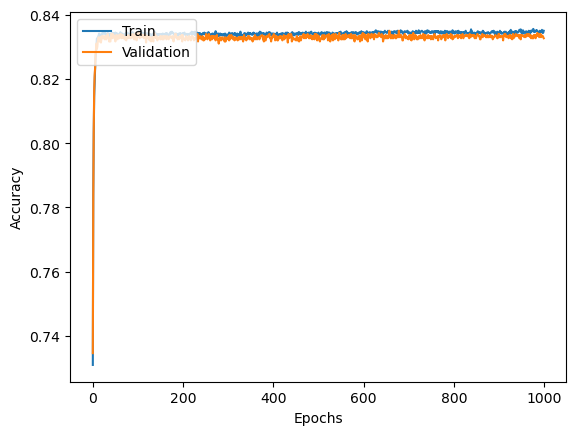

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 4.3 Variance Threshold (*Feature Selection Method*)

We perform feature selection by filter out all features with variance lower than 0.25 because these features do not provide that much information for classification. Features with low variance often have limited ability to discriminate between different instances in the dataset. In the context of a classification problem, a feature that doesn't change much between classes is less likely to be useful for distinguishing between those classes.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Removing both constant and quasi-constant
var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(df)

# True = High Variance; False = Low Variance
var_thr.get_support()

concol = [column for column in df.columns
          if column not in df.columns[var_thr.get_support()]]

# Print column names with low variance
# We will drop them from the data set
for features in concol:
    print(features)

print(concol)
concol.remove('Diabetes') # Keeping target feature


HDL
Diabetes
Depression
HTN
OA
COPD
Sex
['HDL', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex']


In [ ]:
df_vt = df.drop(concol, axis = 1)

df_vt = df_vt.drop('FBS', axis=1)
df_vt = df_vt.drop('Total_Cholesterol', axis=1)# FBS and total cholesterol chosen to be excluded due to domain expertise
df_vt.head()

Age_at_Exam    sBP        BMI   LDL  A1c    TG  Diabetes
0         65.0  126.0  31.000000  1.66  5.4  2.28       0.0
1         62.0  135.0  25.846483  2.49  5.8  1.37       0.0
2         63.0  133.0  30.900000  1.65  6.1  0.76       0.0
3         51.0  136.0  56.710775  2.80  6.0  0.99       0.0
4         40.0  123.0  33.067867  2.48  5.8  1.04       0.0

### 4.3.1 Median Imputation (Variance Threshold Features)

In [ ]:
train_df = df_vt.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_df = df_vt.drop(train_df.index)

imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.

# Use this mean to fill the NaN values in both training, validation, and test sets
imputer.fit(train_df[["LDL"]])
train_df["LDL"] = imputer.transform(train_df[['LDL']])
test_df["LDL"] = imputer.transform(test_df[['LDL']])

imputer.fit(train_df[["sBP"]])
train_df["sBP"] = imputer.transform(train_df[['sBP']])
test_df["sBP"] = imputer.transform(test_df[['sBP']])

imputer.fit(train_df[["TG"]])
train_df["TG"] = imputer.transform(train_df[['TG']])
test_df["TG"] = imputer.transform(test_df[['TG']])

# Extract the 'Diabetes' column as the target variable for training and testing
Y_train = train_df['Diabetes'].to_numpy()
Y_test = test_df['Diabetes'].to_numpy()

# Extract the features (excluding 'Diabetes') for training and testing
X_train = train_df.drop('Diabetes', axis=1).to_numpy()
X_test = test_df.drop('Diabetes', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Define Tensors

In [ ]:
    X_train_tensor = t.Tensor(X_train).type(t.float32)
    Y_train_tensor = t.Tensor(Y_train).type(t.float32)

    X_test_tensor = t.Tensor(X_test).type(t.float32)
    Y_test_tensor = t.Tensor(Y_test).type(t.float32)

### 4.3.2 Grid Search for Hyperparameter Tuning (*Dropout Regularization*)

In [ ]:
import random
number_of_input_features = 6
epochs = 1000

# Define the hyperparameter space
hyperparameter_space = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'number_of_hidden_units': [64, 128, 256],
    'dropout_probability': [0.2, 0.3, 0.4]
}

# Lists to store results for each set of hyperparameters
random_search_results = []

# Random Search
num_iterations = 10  # Number of iterations for random search

for _ in range(num_iterations):
    # Randomly select hyperparameters
    hyperparams = {
        'learning_rate': random.choice(hyperparameter_space['learning_rate']),
        'batch_size': random.choice(hyperparameter_space['batch_size']),
        'number_of_hidden_units': random.choice(hyperparameter_space['number_of_hidden_units']),
        'dropout_probability': random.choice(hyperparameter_space['dropout_probability'])
    }

    # Create and train the model with the current set of hyperparameters
    model = nn.Sequential(
        nn.Linear(number_of_input_features, hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Dropout(hyperparams['dropout_probability']),
        nn.Linear(hyperparams['number_of_hidden_units'], hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Dropout(hyperparams['dropout_probability']),
        nn.Linear(hyperparams['number_of_hidden_units'], 1),
        nn.Sigmoid()
    )

    optimizer = Adam(model.parameters(), lr=hyperparams['learning_rate'])
    loss_fn = t.nn.BCELoss()

    # Prepare data loader
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)

    # Training loop
    for epoch in range(epochs):
        per_epoch_loss_list = []

        for batch_idx, (X, Y) in enumerate(train_data_loader):
            probs = model(X)
            loss = loss_fn(probs.view(-1), Y)
            per_epoch_loss_list.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on validation data
    with t.no_grad():
        model.eval()

        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        random_search_results.append({
            'hyperparameters': hyperparams,
            'validation_accuracy': validation_accuracy
        })

# Print or analyze the random grid search results
for result in random_search_results:
    print(f"Hyperparameters: {result['hyperparameters']}")
    print(f"Validation Accuracy: {result['validation_accuracy']}")
    print()

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 32, 'number_of_hidden_units': 128, 'dropout_probability': 0.2}
Validation Accuracy: 0.8299999833106995

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'number_of_hidden_units': 128, 'dropout_probability': 0.4}
Validation Accuracy: 0.824999988079071

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 64, 'number_of_hidden_units': 64, 'dropout_probability': 0.4}
Validation Accuracy: 0.8169999718666077

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 128, 'number_of_hidden_units': 256, 'dropout_probability': 0.3}
Validation Accuracy: 0.8163333535194397

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 32, 'number_of_hidden_units': 128, 'dropout_probability': 0.3}
Validation Accuracy: 0.8330000042915344

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 64, 'number_of_hidden_units': 128, 'dropout_probability': 0.3}
Validation Accuracy: 0.8086666464805603

Hyperparameters: {'learning_rate': 0.1, 'batch

### 4.3.3 First Neural Network - Dropout, Two layers

In [ ]:
number_of_input_features = 6
number_of_hidden_units = 128
epochs = 1000
learning_rate = 0.0001
batch_size = 32
dropout_probability = 0.3

# Prepare the data
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with drop-out
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),
    nn.Tanh(),
    nn.Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, number_of_hidden_units),
    nn.Tanh(),
    nn.Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),
    nn.Sigmoid()  # Sigmoid activation for probability output due to binary outcome
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy: 0.8131428360939026, validation_accuracy: 0.8119999766349792
epoch 1/1000 ---> train_accuracy: 0.8265714049339294, validation_accuracy: 0.8180000185966492
epoch 2/1000 ---> train_accuracy: 0.8317142724990845, validation_accuracy: 0.8220000267028809
epoch 3/1000 ---> train_accuracy: 0.8330000042915344, validation_accuracy: 0.8256666660308838
epoch 4/1000 ---> train_accuracy: 0.833142876625061, validation_accuracy: 0.828000009059906
epoch 5/1000 ---> train_accuracy: 0.8325714468955994, validation_accuracy: 0.8286666870117188
epoch 6/1000 ---> train_accuracy: 0.8318571448326111, validation_accuracy: 0.8299999833106995
epoch 7/1000 ---> train_accuracy: 0.8339999914169312, validation_accuracy: 0.8286666870117188
epoch 8/1000 ---> train_accuracy: 0.8349999785423279, validation_accuracy: 0.8296666741371155
epoch 9/1000 ---> train_accuracy: 0.8328571319580078, validation_accuracy: 0.8289999961853027
epoch 10/1000 ---> train_accuracy: 0.8344285488128662, validat

epoch 88/1000 ---> train_accuracy: 0.8372856974601746, validation_accuracy: 0.8360000252723694
epoch 89/1000 ---> train_accuracy: 0.8374285697937012, validation_accuracy: 0.8349999785423279
epoch 90/1000 ---> train_accuracy: 0.8379999995231628, validation_accuracy: 0.8360000252723694
epoch 91/1000 ---> train_accuracy: 0.8379999995231628, validation_accuracy: 0.8349999785423279
epoch 92/1000 ---> train_accuracy: 0.8378571271896362, validation_accuracy: 0.8336666822433472
epoch 93/1000 ---> train_accuracy: 0.8379999995231628, validation_accuracy: 0.8363333344459534
epoch 94/1000 ---> train_accuracy: 0.8378571271896362, validation_accuracy: 0.8360000252723694
epoch 95/1000 ---> train_accuracy: 0.8374285697937012, validation_accuracy: 0.8353333473205566
epoch 96/1000 ---> train_accuracy: 0.8378571271896362, validation_accuracy: 0.8353333473205566
epoch 97/1000 ---> train_accuracy: 0.8389999866485596, validation_accuracy: 0.8356666564941406
epoch 98/1000 ---> train_accuracy: 0.8384285569190

epoch 174/1000 ---> train_accuracy: 0.8375714421272278, validation_accuracy: 0.8309999704360962
epoch 175/1000 ---> train_accuracy: 0.8387143015861511, validation_accuracy: 0.8330000042915344
epoch 176/1000 ---> train_accuracy: 0.8384285569190979, validation_accuracy: 0.8320000171661377
epoch 177/1000 ---> train_accuracy: 0.8389999866485596, validation_accuracy: 0.8320000171661377
epoch 178/1000 ---> train_accuracy: 0.8385714292526245, validation_accuracy: 0.8326666951179504
epoch 179/1000 ---> train_accuracy: 0.838857114315033, validation_accuracy: 0.8326666951179504
epoch 180/1000 ---> train_accuracy: 0.8387143015861511, validation_accuracy: 0.8333333134651184
epoch 181/1000 ---> train_accuracy: 0.8375714421272278, validation_accuracy: 0.8309999704360962
epoch 182/1000 ---> train_accuracy: 0.8382856845855713, validation_accuracy: 0.8320000171661377
epoch 183/1000 ---> train_accuracy: 0.8379999995231628, validation_accuracy: 0.8320000171661377
epoch 184/1000 ---> train_accuracy: 0.837

epoch 260/1000 ---> train_accuracy: 0.8385714292526245, validation_accuracy: 0.8296666741371155
epoch 261/1000 ---> train_accuracy: 0.8389999866485596, validation_accuracy: 0.8296666741371155
epoch 262/1000 ---> train_accuracy: 0.838857114315033, validation_accuracy: 0.8289999961853027
epoch 263/1000 ---> train_accuracy: 0.8387143015861511, validation_accuracy: 0.8289999961853027
epoch 264/1000 ---> train_accuracy: 0.838857114315033, validation_accuracy: 0.82833331823349
epoch 265/1000 ---> train_accuracy: 0.8397142887115479, validation_accuracy: 0.8303333520889282
epoch 266/1000 ---> train_accuracy: 0.8392857313156128, validation_accuracy: 0.8296666741371155
epoch 267/1000 ---> train_accuracy: 0.8391428589820862, validation_accuracy: 0.8289999961853027
epoch 268/1000 ---> train_accuracy: 0.8384285569190979, validation_accuracy: 0.8293333053588867
epoch 269/1000 ---> train_accuracy: 0.8391428589820862, validation_accuracy: 0.82833331823349
epoch 270/1000 ---> train_accuracy: 0.83857142

epoch 346/1000 ---> train_accuracy: 0.8387143015861511, validation_accuracy: 0.8289999961853027
epoch 347/1000 ---> train_accuracy: 0.8391428589820862, validation_accuracy: 0.8296666741371155
epoch 348/1000 ---> train_accuracy: 0.838857114315033, validation_accuracy: 0.8293333053588867
epoch 349/1000 ---> train_accuracy: 0.8398571610450745, validation_accuracy: 0.8286666870117188
epoch 350/1000 ---> train_accuracy: 0.8399999737739563, validation_accuracy: 0.8296666741371155
epoch 351/1000 ---> train_accuracy: 0.8391428589820862, validation_accuracy: 0.8289999961853027
epoch 352/1000 ---> train_accuracy: 0.8395714163780212, validation_accuracy: 0.8286666870117188
epoch 353/1000 ---> train_accuracy: 0.8398571610450745, validation_accuracy: 0.8299999833106995
epoch 354/1000 ---> train_accuracy: 0.8398571610450745, validation_accuracy: 0.8306666612625122
epoch 355/1000 ---> train_accuracy: 0.8401428461074829, validation_accuracy: 0.8299999833106995
epoch 356/1000 ---> train_accuracy: 0.839

epoch 432/1000 ---> train_accuracy: 0.8391428589820862, validation_accuracy: 0.8296666741371155
epoch 433/1000 ---> train_accuracy: 0.8408571481704712, validation_accuracy: 0.8309999704360962
epoch 434/1000 ---> train_accuracy: 0.8408571481704712, validation_accuracy: 0.8296666741371155
epoch 435/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8293333053588867
epoch 436/1000 ---> train_accuracy: 0.8399999737739563, validation_accuracy: 0.8293333053588867
epoch 437/1000 ---> train_accuracy: 0.8397142887115479, validation_accuracy: 0.8286666870117188
epoch 438/1000 ---> train_accuracy: 0.8401428461074829, validation_accuracy: 0.82833331823349
epoch 439/1000 ---> train_accuracy: 0.8402857184410095, validation_accuracy: 0.8299999833106995
epoch 440/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8299999833106995
epoch 441/1000 ---> train_accuracy: 0.8401428461074829, validation_accuracy: 0.8293333053588867
epoch 442/1000 ---> train_accuracy: 0.8420

epoch 518/1000 ---> train_accuracy: 0.8408571481704712, validation_accuracy: 0.8293333053588867
epoch 519/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8276666402816772
epoch 520/1000 ---> train_accuracy: 0.8415714502334595, validation_accuracy: 0.8289999961853027
epoch 521/1000 ---> train_accuracy: 0.8414285778999329, validation_accuracy: 0.8286666870117188
epoch 522/1000 ---> train_accuracy: 0.8397142887115479, validation_accuracy: 0.8299999833106995
epoch 523/1000 ---> train_accuracy: 0.8407142758369446, validation_accuracy: 0.8296666741371155
epoch 524/1000 ---> train_accuracy: 0.8399999737739563, validation_accuracy: 0.8289999961853027
epoch 525/1000 ---> train_accuracy: 0.8401428461074829, validation_accuracy: 0.82833331823349
epoch 526/1000 ---> train_accuracy: 0.8407142758369446, validation_accuracy: 0.8296666741371155
epoch 527/1000 ---> train_accuracy: 0.840571403503418, validation_accuracy: 0.8289999961853027
epoch 528/1000 ---> train_accuracy: 0.84071

epoch 604/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8276666402816772
epoch 605/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8296666741371155
epoch 606/1000 ---> train_accuracy: 0.8415714502334595, validation_accuracy: 0.8293333053588867
epoch 607/1000 ---> train_accuracy: 0.8418571352958679, validation_accuracy: 0.8299999833106995
epoch 608/1000 ---> train_accuracy: 0.8424285650253296, validation_accuracy: 0.8293333053588867
epoch 609/1000 ---> train_accuracy: 0.8412857055664062, validation_accuracy: 0.82833331823349
epoch 610/1000 ---> train_accuracy: 0.8414285778999329, validation_accuracy: 0.8293333053588867
epoch 611/1000 ---> train_accuracy: 0.8412857055664062, validation_accuracy: 0.8296666741371155
epoch 612/1000 ---> train_accuracy: 0.8417142629623413, validation_accuracy: 0.8289999961853027
epoch 613/1000 ---> train_accuracy: 0.8425714373588562, validation_accuracy: 0.828000009059906
epoch 614/1000 ---> train_accuracy: 0.84242

epoch 690/1000 ---> train_accuracy: 0.8414285778999329, validation_accuracy: 0.8286666870117188
epoch 691/1000 ---> train_accuracy: 0.8417142629623413, validation_accuracy: 0.8296666741371155
epoch 692/1000 ---> train_accuracy: 0.8412857055664062, validation_accuracy: 0.8296666741371155
epoch 693/1000 ---> train_accuracy: 0.8418571352958679, validation_accuracy: 0.8293333053588867
epoch 694/1000 ---> train_accuracy: 0.8420000076293945, validation_accuracy: 0.8289999961853027
epoch 695/1000 ---> train_accuracy: 0.8411428332328796, validation_accuracy: 0.8289999961853027
epoch 696/1000 ---> train_accuracy: 0.8424285650253296, validation_accuracy: 0.8293333053588867
epoch 697/1000 ---> train_accuracy: 0.8429999947547913, validation_accuracy: 0.8289999961853027
epoch 698/1000 ---> train_accuracy: 0.8424285650253296, validation_accuracy: 0.8296666741371155
epoch 699/1000 ---> train_accuracy: 0.8435714244842529, validation_accuracy: 0.8266666531562805
epoch 700/1000 ---> train_accuracy: 0.84

epoch 776/1000 ---> train_accuracy: 0.8431428670883179, validation_accuracy: 0.8293333053588867
epoch 777/1000 ---> train_accuracy: 0.8434285521507263, validation_accuracy: 0.8303333520889282
epoch 778/1000 ---> train_accuracy: 0.8438571691513062, validation_accuracy: 0.8296666741371155
epoch 779/1000 ---> train_accuracy: 0.8441428542137146, validation_accuracy: 0.8299999833106995
epoch 780/1000 ---> train_accuracy: 0.8441428542137146, validation_accuracy: 0.8296666741371155
epoch 781/1000 ---> train_accuracy: 0.8434285521507263, validation_accuracy: 0.8299999833106995
epoch 782/1000 ---> train_accuracy: 0.8429999947547913, validation_accuracy: 0.8299999833106995
epoch 783/1000 ---> train_accuracy: 0.8418571352958679, validation_accuracy: 0.8293333053588867
epoch 784/1000 ---> train_accuracy: 0.8450000286102295, validation_accuracy: 0.8289999961853027
epoch 785/1000 ---> train_accuracy: 0.8455714583396912, validation_accuracy: 0.8293333053588867
epoch 786/1000 ---> train_accuracy: 0.84

epoch 862/1000 ---> train_accuracy: 0.8434285521507263, validation_accuracy: 0.8299999833106995
epoch 863/1000 ---> train_accuracy: 0.8460000157356262, validation_accuracy: 0.8296666741371155
epoch 864/1000 ---> train_accuracy: 0.8460000157356262, validation_accuracy: 0.8309999704360962
epoch 865/1000 ---> train_accuracy: 0.8437142968177795, validation_accuracy: 0.8306666612625122
epoch 866/1000 ---> train_accuracy: 0.8444285988807678, validation_accuracy: 0.8299999833106995
epoch 867/1000 ---> train_accuracy: 0.8434285521507263, validation_accuracy: 0.8289999961853027
epoch 868/1000 ---> train_accuracy: 0.8461428284645081, validation_accuracy: 0.8309999704360962
epoch 869/1000 ---> train_accuracy: 0.8431428670883179, validation_accuracy: 0.8306666612625122
epoch 870/1000 ---> train_accuracy: 0.8454285860061646, validation_accuracy: 0.8309999704360962
epoch 871/1000 ---> train_accuracy: 0.8445714116096497, validation_accuracy: 0.8306666612625122
epoch 872/1000 ---> train_accuracy: 0.84

epoch 948/1000 ---> train_accuracy: 0.8458571434020996, validation_accuracy: 0.8299999833106995
epoch 949/1000 ---> train_accuracy: 0.8460000157356262, validation_accuracy: 0.8299999833106995
epoch 950/1000 ---> train_accuracy: 0.8445714116096497, validation_accuracy: 0.8289999961853027
epoch 951/1000 ---> train_accuracy: 0.8465714454650879, validation_accuracy: 0.8303333520889282
epoch 952/1000 ---> train_accuracy: 0.8464285731315613, validation_accuracy: 0.8299999833106995
epoch 953/1000 ---> train_accuracy: 0.8467142581939697, validation_accuracy: 0.8296666741371155
epoch 954/1000 ---> train_accuracy: 0.8461428284645081, validation_accuracy: 0.8303333520889282
epoch 955/1000 ---> train_accuracy: 0.8458571434020996, validation_accuracy: 0.8303333520889282
epoch 956/1000 ---> train_accuracy: 0.845714271068573, validation_accuracy: 0.8303333520889282
epoch 957/1000 ---> train_accuracy: 0.8458571434020996, validation_accuracy: 0.8296666741371155
epoch 958/1000 ---> train_accuracy: 0.846

In [ ]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8373333215713501

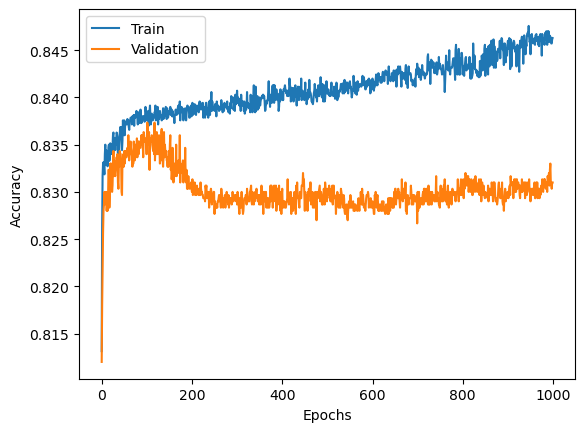

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 4.3.4 Grid Search for Hyperparameter Tuning (*Lambda Regularization*)

In [ ]:
import torch as t
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import random

# Define the hyperparameter space
hyperparameter_space = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'number_of_hidden_units': [64, 128, 256],
    'landa': [0.001, 0.01, 0.1]  # Replace dropout_probability with landa
}

# Lists to store results for each set of hyperparameters
random_search_results = []

# Random Search
num_iterations = 10  # Number of iterations for random search

for _ in range(num_iterations):
    # Randomly select hyperparameters
    hyperparams = {
        'learning_rate': random.choice(hyperparameter_space['learning_rate']),
        'batch_size': random.choice(hyperparameter_space['batch_size']),
        'number_of_hidden_units': random.choice(hyperparameter_space['number_of_hidden_units']),
        'landa': random.choice(hyperparameter_space['landa'])  # Replace dropout_probability with landa
    }

    # Create and train the model with the current set of hyperparameters
    model = nn.Sequential(
        nn.Linear(number_of_input_features, hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Linear(hyperparams['number_of_hidden_units'], hyperparams['number_of_hidden_units']),
        nn.Tanh(),
        nn.Linear(hyperparams['number_of_hidden_units'], 1),
        nn.Sigmoid()
    )

    optimizer = Adam(model.parameters(), lr=hyperparams['learning_rate'])
    loss_fn = t.nn.BCELoss()

    # Prepare data loader
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True)

    # Training loop
    for epoch in range(epochs):
        per_epoch_loss_list = []

        for batch_idx, (X, Y) in enumerate(train_data_loader):
            probs = model(X)
            l2_term = sum([(w ** 2).sum() for w in model.parameters()])
            loss = loss_fn(probs.view(-1), Y) + hyperparams['landa'] * l2_term
            per_epoch_loss_list.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on validation data
    with t.no_grad():
        model.eval()

        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        random_search_results.append({
            'hyperparameters': hyperparams,
            'validation_accuracy': validation_accuracy
        })

# Print or analyze the random grid search results
for result in random_search_results:
    print(f"Hyperparameters: {result['hyperparameters']}")
    print(f"Validation Accuracy: {result['validation_accuracy']}")
    print()

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 128, 'number_of_hidden_units': 256, 'landa': 0.1}
Validation Accuracy: 0.5043333172798157

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'number_of_hidden_units': 256, 'landa': 0.001}
Validation Accuracy: 0.8276666402816772

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 128, 'number_of_hidden_units': 128, 'landa': 0.1}
Validation Accuracy: 0.5043333172798157

Hyperparameters: {'learning_rate': 0.01, 'batch_size': 64, 'number_of_hidden_units': 256, 'landa': 0.01}
Validation Accuracy: 0.8276666402816772

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 128, 'number_of_hidden_units': 64, 'landa': 0.1}
Validation Accuracy: 0.49566665291786194

Hyperparameters: {'learning_rate': 0.1, 'batch_size': 64, 'number_of_hidden_units': 128, 'landa': 0.01}
Validation Accuracy: 0.8073333501815796

Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 64, 'number_of_hidden_units': 256, 'landa': 0.1}
Validation Accura

### 4.3.5 Second Neural Network - L2 Regularization, Two layers

In [ ]:
number_of_input_features = 6
number_of_hidden_units = 64
epochs = 1000
learning_rate = 0.001
batch_size = 64
landa = 0.001

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, number_of_hidden_units),
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy
train_loss_list = []  # List to store training loss

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.8298571705818176, Validation Accuracy: 0.8223333358764648
Epoch 1/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8303333520889282
Epoch 2/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8343333601951599
Epoch 3/1000 ---> Train Accuracy: 0.8327142596244812, Validation Accuracy: 0.8266666531562805
Epoch 4/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8353333473205566
Epoch 5/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8316666483879089
Epoch 6/1000 ---> Train Accuracy: 0.8327142596244812, Validation Accuracy: 0.828000009059906
Epoch 7/1000 ---> Train Accuracy: 0.8352857232093811, Validation Accuracy: 0.8303333520889282
Epoch 8/1000 ---> Train Accuracy: 0.8317142724990845, Validation Accuracy: 0.824999988079071
Epoch 9/1000 ---> Train Accuracy: 0.8321428298950195, Validation Accuracy: 0.8286666870117188
Epoch 10/1000 ---> Train Accuracy: 0.8354285955429077, Validat

Epoch 87/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8243333101272583
Epoch 88/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8333333134651184
Epoch 89/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8353333473205566
Epoch 90/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8370000123977661
Epoch 91/1000 ---> Train Accuracy: 0.8387143015861511, Validation Accuracy: 0.8373333215713501
Epoch 92/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8363333344459534
Epoch 93/1000 ---> Train Accuracy: 0.8394285440444946, Validation Accuracy: 0.8353333473205566
Epoch 94/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8376666903495789
Epoch 95/1000 ---> Train Accuracy: 0.8379999995231628, Validation Accuracy: 0.8360000252723694
Epoch 96/1000 ---> Train Accuracy: 0.8351428508758545, Validation Accuracy: 0.8296666741371155
Epoch 97/1000 ---> Train Accuracy: 0.83828568458557

Epoch 174/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8379999995231628
Epoch 175/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8383333086967468
Epoch 176/1000 ---> Train Accuracy: 0.8384285569190979, Validation Accuracy: 0.8370000123977661
Epoch 177/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8326666951179504
Epoch 178/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8343333601951599
Epoch 179/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8339999914169312
Epoch 180/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8349999785423279
Epoch 181/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8323333263397217
Epoch 182/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8373333215713501
Epoch 183/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8343333601951599
Epoch 184/1000 ---> Train Accuracy: 0.83

Epoch 261/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8370000123977661
Epoch 262/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8349999785423279
Epoch 263/1000 ---> Train Accuracy: 0.8382856845855713, Validation Accuracy: 0.8360000252723694
Epoch 264/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8379999995231628
Epoch 265/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8366666436195374
Epoch 266/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8363333344459534
Epoch 267/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8353333473205566
Epoch 268/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8360000252723694
Epoch 269/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8363333344459534
Epoch 270/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8343333601951599
Epoch 271/1000 ---> Train Accuracy: 0.83

Epoch 348/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8343333601951599
Epoch 349/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8360000252723694
Epoch 350/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8349999785423279
Epoch 351/1000 ---> Train Accuracy: 0.8379999995231628, Validation Accuracy: 0.8356666564941406
Epoch 352/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8360000252723694
Epoch 353/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8353333473205566
Epoch 354/1000 ---> Train Accuracy: 0.8385714292526245, Validation Accuracy: 0.8373333215713501
Epoch 355/1000 ---> Train Accuracy: 0.8387143015861511, Validation Accuracy: 0.8346666693687439
Epoch 356/1000 ---> Train Accuracy: 0.8372856974601746, Validation Accuracy: 0.8346666693687439
Epoch 357/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8339999914169312
Epoch 358/1000 ---> Train Accuracy: 0.83

Epoch 435/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8353333473205566
Epoch 436/1000 ---> Train Accuracy: 0.8360000252723694, Validation Accuracy: 0.8326666951179504
Epoch 437/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8366666436195374
Epoch 438/1000 ---> Train Accuracy: 0.8372856974601746, Validation Accuracy: 0.8353333473205566
Epoch 439/1000 ---> Train Accuracy: 0.8357142806053162, Validation Accuracy: 0.8330000042915344
Epoch 440/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8349999785423279
Epoch 441/1000 ---> Train Accuracy: 0.8378571271896362, Validation Accuracy: 0.8333333134651184
Epoch 442/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8343333601951599
Epoch 443/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8363333344459534
Epoch 444/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8323333263397217
Epoch 445/1000 ---> Train Accuracy: 0.83

Epoch 522/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8356666564941406
Epoch 523/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8353333473205566
Epoch 524/1000 ---> Train Accuracy: 0.8379999995231628, Validation Accuracy: 0.8353333473205566
Epoch 525/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8320000171661377
Epoch 526/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8373333215713501
Epoch 527/1000 ---> Train Accuracy: 0.8372856974601746, Validation Accuracy: 0.8339999914169312
Epoch 528/1000 ---> Train Accuracy: 0.8355714082717896, Validation Accuracy: 0.8349999785423279
Epoch 529/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.82833331823349
Epoch 530/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8339999914169312
Epoch 531/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8339999914169312
Epoch 532/1000 ---> Train Accuracy: 0.8375

Epoch 609/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8276666402816772
Epoch 610/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8339999914169312
Epoch 611/1000 ---> Train Accuracy: 0.8372856974601746, Validation Accuracy: 0.8370000123977661
Epoch 612/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8343333601951599
Epoch 613/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8323333263397217
Epoch 614/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8356666564941406
Epoch 615/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8343333601951599
Epoch 616/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8366666436195374
Epoch 617/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8316666483879089
Epoch 618/1000 ---> Train Accuracy: 0.8354285955429077, Validation Accuracy: 0.8353333473205566
Epoch 619/1000 ---> Train Accuracy: 0.83

Epoch 696/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8356666564941406
Epoch 697/1000 ---> Train Accuracy: 0.8379999995231628, Validation Accuracy: 0.8330000042915344
Epoch 698/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8303333520889282
Epoch 699/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8373333215713501
Epoch 700/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8286666870117188
Epoch 701/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8346666693687439
Epoch 702/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8326666951179504
Epoch 703/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8349999785423279
Epoch 704/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8323333263397217
Epoch 705/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8326666951179504
Epoch 706/1000 ---> Train Accuracy: 0.83

Epoch 783/1000 ---> Train Accuracy: 0.8364285826683044, Validation Accuracy: 0.8349999785423279
Epoch 784/1000 ---> Train Accuracy: 0.8378571271896362, Validation Accuracy: 0.8370000123977661
Epoch 785/1000 ---> Train Accuracy: 0.8372856974601746, Validation Accuracy: 0.8346666693687439
Epoch 786/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8339999914169312
Epoch 787/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8330000042915344
Epoch 788/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8349999785423279
Epoch 789/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8363333344459534
Epoch 790/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8356666564941406
Epoch 791/1000 ---> Train Accuracy: 0.8377143144607544, Validation Accuracy: 0.8336666822433472
Epoch 792/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8326666951179504
Epoch 793/1000 ---> Train Accuracy: 0.83

Epoch 870/1000 ---> Train Accuracy: 0.8370000123977661, Validation Accuracy: 0.8346666693687439
Epoch 871/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8356666564941406
Epoch 872/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8333333134651184
Epoch 873/1000 ---> Train Accuracy: 0.8375714421272278, Validation Accuracy: 0.8333333134651184
Epoch 874/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8346666693687439
Epoch 875/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8366666436195374
Epoch 876/1000 ---> Train Accuracy: 0.8379999995231628, Validation Accuracy: 0.8330000042915344
Epoch 877/1000 ---> Train Accuracy: 0.8358571529388428, Validation Accuracy: 0.8363333344459534
Epoch 878/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8360000252723694
Epoch 879/1000 ---> Train Accuracy: 0.8367142677307129, Validation Accuracy: 0.8370000123977661
Epoch 880/1000 ---> Train Accuracy: 0.836

Epoch 957/1000 ---> Train Accuracy: 0.8374285697937012, Validation Accuracy: 0.8370000123977661
Epoch 958/1000 ---> Train Accuracy: 0.8362857103347778, Validation Accuracy: 0.8363333344459534
Epoch 959/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8270000219345093
Epoch 960/1000 ---> Train Accuracy: 0.8371428847312927, Validation Accuracy: 0.8339999914169312
Epoch 961/1000 ---> Train Accuracy: 0.8361428380012512, Validation Accuracy: 0.8360000252723694
Epoch 962/1000 ---> Train Accuracy: 0.8355714082717896, Validation Accuracy: 0.8333333134651184
Epoch 963/1000 ---> Train Accuracy: 0.8368571400642395, Validation Accuracy: 0.8373333215713501
Epoch 964/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8316666483879089
Epoch 965/1000 ---> Train Accuracy: 0.836571455001831, Validation Accuracy: 0.8346666693687439
Epoch 966/1000 ---> Train Accuracy: 0.8378571271896362, Validation Accuracy: 0.8360000252723694
Epoch 967/1000 ---> Train Accuracy: 0.8367

In [ ]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8403333425521851

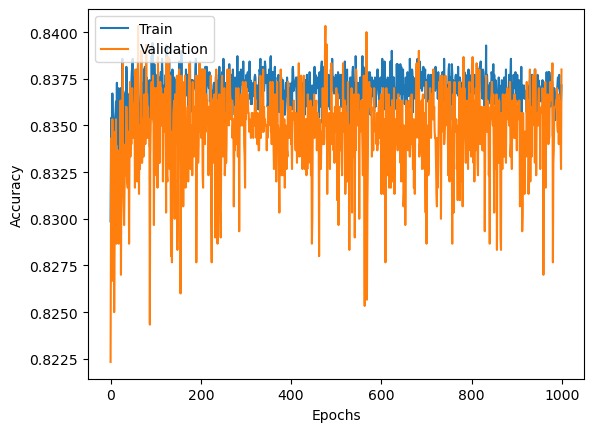

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 4.3.6 Third Neural Network - L2 Regularization, One Layer


In [ ]:
number_of_input_features = 6
number_of_hidden_units = 256
epochs = 1000
learning_rate = 0.0001
batch_size = 64
landa = 0.001

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy
train_loss_list = []  # List to store training loss

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.7540000081062317, Validation Accuracy: 0.7393333315849304
Epoch 1/1000 ---> Train Accuracy: 0.7871428728103638, Validation Accuracy: 0.7833333611488342
Epoch 2/1000 ---> Train Accuracy: 0.8007143139839172, Validation Accuracy: 0.7976666688919067
Epoch 3/1000 ---> Train Accuracy: 0.8091428279876709, Validation Accuracy: 0.8073333501815796
Epoch 4/1000 ---> Train Accuracy: 0.8149999976158142, Validation Accuracy: 0.8136666417121887
Epoch 5/1000 ---> Train Accuracy: 0.8185714483261108, Validation Accuracy: 0.8186666369438171
Epoch 6/1000 ---> Train Accuracy: 0.8247143030166626, Validation Accuracy: 0.8209999799728394
Epoch 7/1000 ---> Train Accuracy: 0.8270000219345093, Validation Accuracy: 0.8213333487510681
Epoch 8/1000 ---> Train Accuracy: 0.8278571367263794, Validation Accuracy: 0.8206666707992554
Epoch 9/1000 ---> Train Accuracy: 0.8295714259147644, Validation Accuracy: 0.8253333568572998
Epoch 10/1000 ---> Train Accuracy: 0.8308571577072144, Valid

Epoch 87/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.831333339214325
Epoch 88/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8320000171661377
Epoch 89/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 90/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8309999704360962
Epoch 91/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8309999704360962
Epoch 92/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8303333520889282
Epoch 93/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8309999704360962
Epoch 94/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 95/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.831333339214325
Epoch 96/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8309999704360962
Epoch 97/1000 ---> Train Accuracy: 0.833571434020996

Epoch 174/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.831333339214325
Epoch 175/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8306666612625122
Epoch 176/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8306666612625122
Epoch 177/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8303333520889282
Epoch 178/1000 ---> Train Accuracy: 0.8330000042915344, Validation Accuracy: 0.8303333520889282
Epoch 179/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8303333520889282
Epoch 180/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8306666612625122
Epoch 181/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8309999704360962
Epoch 182/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.8303333520889282
Epoch 183/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8303333520889282
Epoch 184/1000 ---> Train Accuracy: 0.833

Epoch 261/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8299999833106995
Epoch 262/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8289999961853027
Epoch 263/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8306666612625122
Epoch 264/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8306666612625122
Epoch 265/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8303333520889282
Epoch 266/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8303333520889282
Epoch 267/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8309999704360962
Epoch 268/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8309999704360962
Epoch 269/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8309999704360962
Epoch 270/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8303333520889282
Epoch 271/1000 ---> Train Accuracy: 0.834

Epoch 348/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8306666612625122
Epoch 349/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8309999704360962
Epoch 350/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8303333520889282
Epoch 351/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8303333520889282
Epoch 352/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8306666612625122
Epoch 353/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8303333520889282
Epoch 354/1000 ---> Train Accuracy: 0.834857165813446, Validation Accuracy: 0.8309999704360962
Epoch 355/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8303333520889282
Epoch 356/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8299999833106995
Epoch 357/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.8306666612625122
Epoch 358/1000 ---> Train Accuracy: 0.833

Epoch 435/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.831333339214325
Epoch 436/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8303333520889282
Epoch 437/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8306666612625122
Epoch 438/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8303333520889282
Epoch 439/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8303333520889282
Epoch 440/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.831333339214325
Epoch 441/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8316666483879089
Epoch 442/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8306666612625122
Epoch 443/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8306666612625122
Epoch 444/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8296666741371155
Epoch 445/1000 ---> Train Accuracy: 0.8342

Epoch 522/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 523/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.831333339214325
Epoch 524/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8306666612625122
Epoch 525/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8309999704360962
Epoch 526/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8309999704360962
Epoch 527/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8306666612625122
Epoch 528/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8309999704360962
Epoch 529/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.8309999704360962
Epoch 530/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8303333520889282
Epoch 531/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8316666483879089
Epoch 532/1000 ---> Train Accuracy: 0.834

Epoch 609/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 610/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8309999704360962
Epoch 611/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8309999704360962
Epoch 612/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8309999704360962
Epoch 613/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8309999704360962
Epoch 614/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.831333339214325
Epoch 615/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8306666612625122
Epoch 616/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8309999704360962
Epoch 617/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8316666483879089
Epoch 618/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8309999704360962
Epoch 619/1000 ---> Train Accuracy: 0.834

Epoch 696/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.831333339214325
Epoch 697/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.831333339214325
Epoch 698/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.831333339214325
Epoch 699/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8306666612625122
Epoch 700/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8309999704360962
Epoch 701/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.831333339214325
Epoch 702/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8309999704360962
Epoch 703/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8306666612625122
Epoch 704/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.831333339214325
Epoch 705/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.831333339214325
Epoch 706/1000 ---> Train Accuracy: 0.83399999

Epoch 783/1000 ---> Train Accuracy: 0.8347142934799194, Validation Accuracy: 0.8320000171661377
Epoch 784/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8309999704360962
Epoch 785/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8320000171661377
Epoch 786/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.8309999704360962
Epoch 787/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.8309999704360962
Epoch 788/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.831333339214325
Epoch 789/1000 ---> Train Accuracy: 0.8335714340209961, Validation Accuracy: 0.8306666612625122
Epoch 790/1000 ---> Train Accuracy: 0.8334285616874695, Validation Accuracy: 0.831333339214325
Epoch 791/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.8316666483879089
Epoch 792/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8306666612625122
Epoch 793/1000 ---> Train Accuracy: 0.8335

Epoch 870/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8320000171661377
Epoch 871/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8320000171661377
Epoch 872/1000 ---> Train Accuracy: 0.8338571190834045, Validation Accuracy: 0.8309999704360962
Epoch 873/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.831333339214325
Epoch 874/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8309999704360962
Epoch 875/1000 ---> Train Accuracy: 0.8337143063545227, Validation Accuracy: 0.8316666483879089
Epoch 876/1000 ---> Train Accuracy: 0.8341428637504578, Validation Accuracy: 0.831333339214325
Epoch 877/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.831333339214325
Epoch 878/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8316666483879089
Epoch 879/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.8316666483879089
Epoch 880/1000 ---> Train Accuracy: 0.83414

Epoch 957/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8323333263397217
Epoch 958/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8316666483879089
Epoch 959/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8326666951179504
Epoch 960/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8316666483879089
Epoch 961/1000 ---> Train Accuracy: 0.8339999914169312, Validation Accuracy: 0.8316666483879089
Epoch 962/1000 ---> Train Accuracy: 0.8342857360839844, Validation Accuracy: 0.831333339214325
Epoch 963/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8316666483879089
Epoch 964/1000 ---> Train Accuracy: 0.8345714211463928, Validation Accuracy: 0.8316666483879089
Epoch 965/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8320000171661377
Epoch 966/1000 ---> Train Accuracy: 0.8344285488128662, Validation Accuracy: 0.8320000171661377
Epoch 967/1000 ---> Train Accuracy: 0.834

In [ ]:
max_validation_accuracy = max(validation_accuracy_list)
max_validation_accuracy

0.8330000042915344

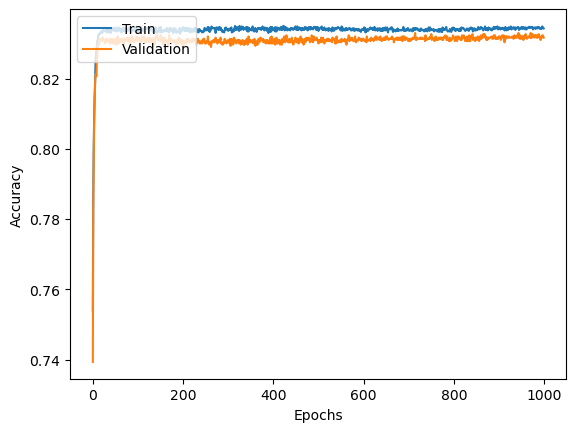

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In conclusion, model 4.2.6 (Neural network based on RFECV feature selection method with L2 regularization and one hidden layer) demonstrated the least amount of overfitting, while maintaining relatively high validation accuracy